---
# **Thư viện**

In [1]:
## Thư viện
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import statistics         as stats
import seaborn           as sns
import scipy.stats       as stats
import warnings
import csv
import re
warnings.filterwarnings('ignore')

from scipy.stats import pearsonr, spearmanr, shapiro

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer
from collections import Counter

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

import math
from matplotlib.ticker import FuncFormatter

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nguyen_Thanh_Vinh\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Nguyen_Thanh_Vinh\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nguyen_Thanh_Vinh\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Nguyen_Thanh_Vinh\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nguyen_Thanh_Vinh\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Do

---
# **Import Dataset**

In [2]:
folder_path = 'C:\\Users\\Nguyen_Thanh_Vinh\\Downloads\\BDTQDL_NHÓM10\\BDTQDL_NHÓM10'

In [3]:
df_hotel = pd.read_csv(folder_path + '\\Hotel_Reviews.csv')
df_hotel.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0              Russia    I am so angry that i made this post available...   
1             Ireland                                         No Negative   
2           Australia    Rooms are nice but for elderly a bit difficul...   
3      United Kingdom    My room was dirty and I was afraid to walk ba...   
4         New Zealand    You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

   Review_Total_Positive_Word_Counts  \
0                                 11   
1                                105   
2                                 21   
3                                 26   
4                                  8   

   Total_Number_of_Reviews_Reviewer_Has_Given  Reviewer_Score  \
0                                           7             2.9   
1                                           7             7.5   
2                                           9             7.1   
3                                           1             3.8   
4                                           3             6.7   

                                                Tags days_since_review  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...            0 days   
2  [' Leisure trip ', ' Family with young childre...            3 days   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...            3 days   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...           10 days   

         lat       lng  
0  52.360576  4.915968  
1  52.360576  4.915968  
2  52.360576  4.915968  
3  52.360576  4.915968  
4  52.360576  4.915968

In [4]:
df_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   Hotel_Address                               515738 non-null  object 
 1   Additional_Number_of_Scoring                515738 non-null  int64  
 2   Review_Date                                 515738 non-null  object 
 3   Average_Score                               515738 non-null  float64
 4   Hotel_Name                                  515738 non-null  object 
 5   Reviewer_Nationality                        515738 non-null  object 
 6   Negative_Review                             515738 non-null  object 
 7   Review_Total_Negative_Word_Counts           515738 non-null  int64  
 8   Total_Number_of_Reviews                     515738 non-null  int64  
 9   Positive_Review                             515738 non-null  object 
 

---
# **Chỉnh dạng dữ liệu**

## **Thêm cột 'Country'**
- Thêm cột *'Country'* vào dữ liệu
- Cột *'Country'* được tạo bằng cách tách tên quốc gia từ cột *'Hotel_Address'*

In [5]:
# Tạo cột Country
def extract_country(address):
    words = address.split()
    two_word_countries = ['United Kingdom']
    if len(words) >= 2 and ' '.join(words[-2:]) in two_word_countries:
        return ' '.join(words[-2:]) 
    return words[-1]

df_hotel['Country'] = df_hotel['Hotel_Address'].apply(extract_country)

In [6]:
df_hotel['Country'].value_counts()

Country
United Kingdom    262301
Spain              60149
France             59928
Netherlands        57214
Austria            38939
Italy              37207
Name: count, dtype: int64

## **Thêm cột 'Reviewer_Regions'**

In [7]:
asia_list = [
    'Afghanistan','Armenia','Azerbaijan','Bangladesh','Brunei Darussalam','Bhutan',
    'People\'s Republic of China','Cyprus','Georgia','Indonesia','Israel','India','Iran','Japan',
    'Kyrgyzstan','North Korea','South Korea','Myanmar','Mongolia','Maldives','Malaysia',
    'Nepal','Philippines','Pakistan','Singapore','Thailand','Tajikistan','Turkmenistan','Turkey',
    'Uzbekistan','Vietnam','Cambodia','Kazakhstan','Laos','Sri Lanka'
]

In [8]:
df_copy=df_hotel.copy()
df_copy['Reviewer_Nationality']=df_copy['Reviewer_Nationality'].str.strip()

# Chuẩn hóa tên quốc gia
asia_list = [x.replace('China', 'People\'s Republic of China') for x in asia_list]

# Thêm cột Reviewer_Regions với hai giá trị 'Asia' và 'Non-Asia'
df_copy['Reviewer_Regions'] = df_copy['Reviewer_Nationality'].apply(lambda x: 'Asia' if x in asia_list else 'Non-Asia')

In [9]:
df_copy['Reviewer_Regions'].value_counts()

Reviewer_Regions
Non-Asia    483184
Asia         32554
Name: count, dtype: int64

## **Tách cột 'Tags'**

In [10]:
# Cột 'Guests'
guests=["Solo traveler", "Couple", "Family with older children", "Family with young children", "Group", "Travelers with friends"]
matches_regex_guests = "|".join(guests)
df_copy['Guests'] = [",".join(itm) if len(itm)>0 else "Not Mention" for itm in df_copy.Tags.str.findall(matches_regex_guests)]

# Cột 'Trip_Type'
df_copy["Trip_Type"]=df_copy['Tags'].map(lambda x: "Leisure trip" if 'Leisure trip'  in x else ('Business trip'  if 'Business trip' in x else "Not Mention"))

# Cột 'Stayed'
df_copy['Stayed']=[(itm)[-1] if len(itm)>1 else (itm)[0]  if len(itm)==1 else 0 for itm in df_copy.Tags.str.findall(r'\d+')]
df_copy['Tags'] = df_copy['Tags'].str.replace(r'Stayed \d+ nights', '', regex=True).str.strip()

# Cột 'Submit'
df_copy['Submit']= df_copy['Tags'].map(lambda x: "from mobile" if 'Submitted ' in x else "Not Mention")

# Cột 'With a pet'
df_copy['With a pet']= df_copy['Tags'].map(lambda x: "With a pet" if 'With a pet' in x else "Not Mention")

In [11]:
df_copy['Tags'] = df_copy.apply(lambda row: row['Tags'].replace(row['Trip_Type'], '').strip(), axis=1)
df_copy['Tags'] = df_copy.apply(lambda row: row['Tags'].replace(row['Guests'], '').strip(), axis=1)
df_copy['Tags'] = df_copy.apply(lambda row: row['Tags'].replace(row['Submit'], '').strip(), axis=1)
df_copy['Tags'] = df_copy.apply(lambda row: row['Tags'].replace(row['With a pet'], '').strip(), axis=1)
df_copy.head()

Hotel_Address  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   

   Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
0                           194    8/3/2017            7.7  Hotel Arena   
1                           194    8/3/2017            7.7  Hotel Arena   
2                           194   7/31/2017            7.7  Hotel Arena   
3                           194   7/31/2017            7.7  Hotel Arena   
4                           194   7/24/2017            7.7  Hotel Arena   

  Reviewer_Nationality                                    Negative_Review  \
0               Russia   I am so angry that i made this post available...   
1              Ireland                                        No Negative   
2            Australia   Rooms are nice but for elderly a bit difficul...   
3       United Kingdom   My room was dirty and I was afraid to walk ba...   
4          New Zealand   You When I booked with your company on line y...   

   Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                397                     1403   
1                                  0                     1403   
2                                 42                     1403   
3                                210                     1403   
4                                140                     1403   

                                     Positive_Review  ...  days_since_review  \
0   Only the park outside of the hotel was beauti...  ...             0 days   
1   No real complaints the hotel was great great ...  ...             0 days   
2   Location was good and staff were ok It is cut...  ...             3 days   
3   Great location in nice surroundings the bar a...  ...             3 days   
4    Amazing location and building Romantic setting   ...            10 days   

         lat       lng      Country Reviewer_Regions  \
0  52.360576  4.915968  Netherlands         Non-Asia   
1  52.360576  4.915968  Netherlands         Non-Asia   
2  52.360576  4.915968  Netherlands         Non-Asia   
3  52.360576  4.915968  Netherlands         Non-Asia   
4  52.360576  4.915968  Netherlands         Non-Asia   

                       Guests     Trip_Type Stayed       Submit   With a pet  
0                      Couple  Leisure trip      6  Not Mention  Not Mention  
1                      Couple  Leisure trip      4  Not Mention  Not Mention  
2  Family with young children  Leisure trip      3  from mobile  Not Mention  
3               Solo traveler  Leisure trip      3  Not Mention  Not Mention  
4                      Couple  Leisure trip      2  from mobile  Not Mention  

[5 rows x 24 columns]

In [12]:
df_split = df_copy['Tags'].str.split(', ', expand=True)
df_split.columns = [f"Tag {i+1}" for i in range(df_split.shape[1])]
df_copy = pd.concat([df_copy, df_split], axis=1)

In [13]:
df_copy.rename(columns={'Tag 3': 'Room_Type'}, inplace=True)

In [14]:
df_copy['Room_Type'] = df_copy['Room_Type'].str.strip("'")

def clean_room_type(value):
    if pd.isna(value) or re.fullmatch(r"[\[\]',\s]*", str(value)):
        return 'Not Mention'
    return value

df_copy['Room_Type'] = df_copy['Room_Type'].apply(clean_room_type)

In [15]:
df_copy.drop(columns=['Tags', 'Tag 1', 'Tag 2', 'Tag 4', 'Tag 5', 'Tag 6'], inplace=True)
df_copy

Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
515733  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515734  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515735  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515736  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
515737  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   
3                                194   7/31/2017            7.7   
4                                194   7/24/2017            7.7   
...                              ...         ...            ...   
515733                           168   8/30/2015            8.1   
515734                           168   8/22/2015            8.1   
515735                           168   8/19/2015            8.1   
515736                           168   8/17/2015            8.1   
515737                           168    8/9/2015            8.1   

                   Hotel_Name Reviewer_Nationality  \
0                 Hotel Arena               Russia   
1                 Hotel Arena              Ireland   
2                 Hotel Arena            Australia   
3                 Hotel Arena       United Kingdom   
4                 Hotel Arena          New Zealand   
...                       ...                  ...   
515733  Atlantis Hotel Vienna               Kuwait   
515734  Atlantis Hotel Vienna              Estonia   
515735  Atlantis Hotel Vienna                Egypt   
515736  Atlantis Hotel Vienna               Mexico   
515737  Atlantis Hotel Vienna              Hungary   

                                          Negative_Review  \
0        I am so angry that i made this post available...   
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
3        My room was dirty and I was afraid to walk ba...   
4        You When I booked with your company on line y...   
...                                                   ...   
515733   no trolly or staff to help you take the lugga...   
515734           The hotel looks like 3 but surely not 4    
515735   The ac was useless It was a hot week in vienn...   
515736                                        No Negative   
515737       I was in 3rd floor It didn t work Free Wife    

        Review_Total_Negative_Word_Counts  Total_Number_of_Reviews  \
0                                     397                     1403   
1                                       0                     1403   
2                                      42                     1403   
3                                     210                     1403   
4                                     140                     1403   
...                                   ...                      ...   
515733                                 14                     2823   
515734                                 11                     2823   
515735                                 19                     2823   
515736                                  0                     2823   
515737                                 13                     2823   

                                          Positive_Review  ...        lat  \
0        Only the park outside of the hotel was beauti...  ...  52.360576   
1        No real complaints the hotel was great great ...  ...  52.360576   
2        Location was good and staff were ok It is c

In [16]:
df_copy['Stayed'] = df_copy['Stayed'].astype(int)

## **Xóa cột**

In [17]:
df_copy.drop(columns=['Average_Score','Total_Number_of_Reviews_Reviewer_Has_Given',
                      'Total_Number_of_Reviews','days_since_review','Additional_Number_of_Scoring', 'lat', 'lng'], inplace=True)

## **Quan sát lại dữ liệu sau khi chỉnh dạng**

In [18]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515738 entries, 0 to 515737
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hotel_Address                      515738 non-null  object 
 1   Review_Date                        515738 non-null  object 
 2   Hotel_Name                         515738 non-null  object 
 3   Reviewer_Nationality               515738 non-null  object 
 4   Negative_Review                    515738 non-null  object 
 5   Review_Total_Negative_Word_Counts  515738 non-null  int64  
 6   Positive_Review                    515738 non-null  object 
 7   Review_Total_Positive_Word_Counts  515738 non-null  int64  
 8   Reviewer_Score                     515738 non-null  float64
 9   Country                            515738 non-null  object 
 10  Reviewer_Regions                   515738 non-null  object 
 11  Guests                             5157

In [19]:
df_copy.describe()

Review_Total_Negative_Word_Counts  Review_Total_Positive_Word_Counts  \
count                      515738.000000                      515738.000000   
mean                           18.539450                          17.776458   
std                            29.690831                          21.804185   
min                             0.000000                           0.000000   
25%                             2.000000                           5.000000   
50%                             9.000000                          11.000000   
75%                            23.000000                          22.000000   
max                           408.000000                         395.000000   

       Reviewer_Score         Stayed  
count   515738.000000  515738.000000  
mean         8.395077       2.361377  
std          1.637856       1.647423  
min          2.500000       0.000000  
25%          7.500000       1.000000  
50%          8.800000       2.000000  
75%          9.600000       3.000000  
max         10.000000      31.000000

# **Exploration**

### **Missing Values & Abnormal Values**

In [20]:
# Kiểm tra Missing Values
missing_values = df_copy.isnull().sum()
missing_percentage = (missing_values / df_copy.shape[0]) * 100
pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': round(missing_percentage,2)})

Missing Values  Percentage (%)
Hotel_Address                                   0             0.0
Review_Date                                     0             0.0
Hotel_Name                                      0             0.0
Reviewer_Nationality                            0             0.0
Negative_Review                                 0             0.0
Review_Total_Negative_Word_Counts               0             0.0
Positive_Review                                 0             0.0
Review_Total_Positive_Word_Counts               0             0.0
Reviewer_Score                                  0             0.0
Country                                         0             0.0
Reviewer_Regions                                0             0.0
Guests                                          0             0.0
Trip_Type                                       0             0.0
Stayed                                          0             0.0
Submit                                          0             0.0
With a pet                                      0             0.0
Room_Type                                       0             0.0

In [21]:
# Kiểm tra các giá trị bất thường
abnormal_values = pd.DataFrame()
for column in df_copy.columns:
    if df_copy[column].dtype != 'object':
        abnormal = df_copy[df_copy[column] < 0]
        abnormal_values = pd.concat([abnormal_values, abnormal])

print("Các giá trị bất thường:")
print(abnormal_values)

Các giá trị bất thường:
Empty DataFrame
Columns: [Hotel_Address, Review_Date, Hotel_Name, Reviewer_Nationality, Negative_Review, Review_Total_Negative_Word_Counts, Positive_Review, Review_Total_Positive_Word_Counts, Reviewer_Score, Country, Reviewer_Regions, Guests, Trip_Type, Stayed, Submit, With a pet, Room_Type]
Index: []


### **Duplicate Values**

In [22]:
# Kiểm tra giá trị trùng lặp
df_copy.duplicated().sum()

527

In [23]:
# Xóa giá trị trùng lặp
df_copy.drop_duplicates(inplace=True,ignore_index=True)

### **Quan sát dữ liệu**

In [24]:
df_copy

Hotel_Address Review_Date  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...    8/3/2017   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...    8/3/2017   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   7/31/2017   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   7/31/2017   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   7/24/2017   
...                                                   ...         ...   
515206  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   8/30/2015   
515207  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   8/22/2015   
515208  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   8/19/2015   
515209  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   8/17/2015   
515210  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...    8/9/2015   

                   Hotel_Name Reviewer_Nationality  \
0                 Hotel Arena               Russia   
1                 Hotel Arena              Ireland   
2                 Hotel Arena            Australia   
3                 Hotel Arena       United Kingdom   
4                 Hotel Arena          New Zealand   
...                       ...                  ...   
515206  Atlantis Hotel Vienna               Kuwait   
515207  Atlantis Hotel Vienna              Estonia   
515208  Atlantis Hotel Vienna                Egypt   
515209  Atlantis Hotel Vienna               Mexico   
515210  Atlantis Hotel Vienna              Hungary   

                                          Negative_Review  \
0        I am so angry that i made this post available...   
1                                             No Negative   
2        Rooms are nice but for elderly a bit difficul...   
3        My room was dirty and I was afraid to walk ba...   
4        You When I booked with your company on line y...   
...                                                   ...   
515206   no trolly or staff to help you take the lugga...   
515207           The hotel looks like 3 but surely not 4    
515208   The ac was useless It was a hot week in vienn...   
515209                                        No Negative   
515210       I was in 3rd floor It didn t work Free Wife    

        Review_Total_Negative_Word_Counts  \
0                                     397   
1                                       0   
2                                      42   
3                                     210   
4                                     140   
...                                   ...   
515206                                 14   
515207                                 11   
515208                                 19   
515209                                  0   
515210                                 13   

                                          Positive_Review  \
0        Only the park outside of the hotel was beauti...   
1        No real complaints the hotel was great great ...   
2        Location was good and staff were ok It is cut...   
3        Great location in nice surroundings the bar a...   
4         Amazing location and building Romantic setting    
...                                                   ...   
515206                                           location   
515207      Breakfast was ok and we got earlier check in    
515208                                        No Positive   
515209   The rooms are enormous and really comfortable...   
515210                               staff was very kind    

        Review_Total_Positive_Word_Counts  Reviewer_Score      Country  \
0                                      11             2.9  Netherlands   
1                                     105             7.5  Netherlands   
2                                      21             7.1  Netherlands   
3                                      26             3.8  Netherlands   
4                                       8             6.7  Netherlands   
...                                   ...             ...          

In [25]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515211 entries, 0 to 515210
Data columns (total 17 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Hotel_Address                      515211 non-null  object 
 1   Review_Date                        515211 non-null  object 
 2   Hotel_Name                         515211 non-null  object 
 3   Reviewer_Nationality               515211 non-null  object 
 4   Negative_Review                    515211 non-null  object 
 5   Review_Total_Negative_Word_Counts  515211 non-null  int64  
 6   Positive_Review                    515211 non-null  object 
 7   Review_Total_Positive_Word_Counts  515211 non-null  int64  
 8   Reviewer_Score                     515211 non-null  float64
 9   Country                            515211 non-null  object 
 10  Reviewer_Regions                   515211 non-null  object 
 11  Guests                             5152

In [26]:
df_copy.describe()

Review_Total_Negative_Word_Counts  Review_Total_Positive_Word_Counts  \
count                      515211.000000                      515211.000000   
mean                           18.540811                          17.778268   
std                            29.694018                          21.804561   
min                             0.000000                           0.000000   
25%                             2.000000                           5.000000   
50%                             9.000000                          11.000000   
75%                            23.000000                          22.000000   
max                           408.000000                         395.000000   

       Reviewer_Score         Stayed  
count   515211.000000  515211.000000  
mean         8.395530       2.361009  
std          1.637468       1.647338  
min          2.500000       0.000000  
25%          7.500000       1.000000  
50%          8.800000       2.000000  
75%          9.600000       3.000000  
max         10.000000      31.000000

In [27]:
numerical_columns = df_copy.select_dtypes(include=['int64', 'float64'])

# Tạo DataFrame chứa các thống kê cơ bản
pd.DataFrame({
    'Rows': numerical_columns.count(),
    'Mean': numerical_columns.mean(),
    'Standard Deviation': numerical_columns.std(),
    'Min': numerical_columns.min(),
    'Max': numerical_columns.max()
})


Rows       Mean  Standard Deviation  Min  \
Review_Total_Negative_Word_Counts  515211  18.540811           29.694018  0.0   
Review_Total_Positive_Word_Counts  515211  17.778268           21.804561  0.0   
Reviewer_Score                     515211   8.395530            1.637468  2.5   

                                     Max  
Review_Total_Negative_Word_Counts  408.0  
Review_Total_Positive_Word_Counts  395.0  
Reviewer_Score                      10.0

In [28]:
df_copy.describe(include='object').T

count  unique  \
Hotel_Address         515211    1493   
Review_Date           515211     731   
Hotel_Name            515211    1492   
Reviewer_Nationality  515211     227   
Negative_Review       515211  330011   
Positive_Review       515211  412601   
Country               515211       6   
Reviewer_Regions      515211       2   
Guests                515211       6   
Trip_Type             515211       3   
Submit                515211       2   
With a pet            515211       2   
Room_Type             515211    2382   

                                                                    top  \
Hotel_Address         163 Marsh Wall Docklands Tower Hamlets London ...   
Review_Date                                                    8/2/2017   
Hotel_Name                   Britannia International Hotel Canary Wharf   
Reviewer_Nationality                                     United Kingdom   
Negative_Review                                             No Negative   
Positive_Review                                             No Positive   
Country                                                  United Kingdom   
Reviewer_Regions                                               Non-Asia   
Guests                                                           Couple   
Trip_Type                                                  Leisure trip   
Submit                                                      from mobile   
With a pet                                                  Not Mention   
Room_Type                                                  Double Room    

                        freq  
Hotel_Address           4789  
Review_Date             2584  
Hotel_Name              4789  
Reviewer_Nationality  245110  
Negative_Review       127757  
Positive_Review        35904  
Country               262297  
Reviewer_Regions      482694  
Guests                252005  
Trip_Type             417355  
Submit                307355  
With a pet            513806  
Room_Type              34027

---
# __KIỂM ĐỊNH__

In [29]:
df_Asia = df_copy[df_copy['Reviewer_Regions'] == 'Asia']

In [30]:
df_Netherlands = df_Asia[df_Asia['Country'] == 'Netherlands']
df_Austria = df_Asia[df_Asia['Country'] == 'Austria']
df_France = df_Asia[df_Asia['Country'] == 'France']
df_Italy = df_Asia[df_Asia['Country'] == 'Italy']
df_Spain = df_Asia[df_Asia['Country'] == 'Spain']
df_UK = df_Asia[df_Asia['Country'] == 'United Kingdom']

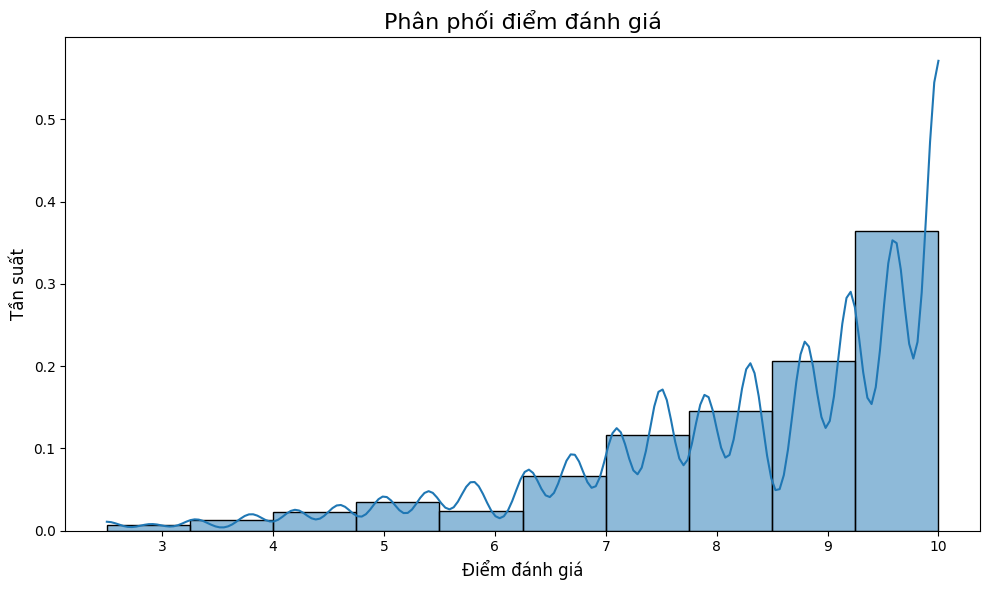

In [31]:
# Vẽ histogram cho Reviewer_Score với tần suất
plt.figure(figsize=(10, 6))
sns.histplot(df_copy['Reviewer_Score'], bins=10, kde=True, palette='Set2', stat='probability')

plt.title('Phân phối điểm đánh giá', fontsize=16)
plt.xlabel('Điểm đánh giá', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

plt.tight_layout()
plt.show()

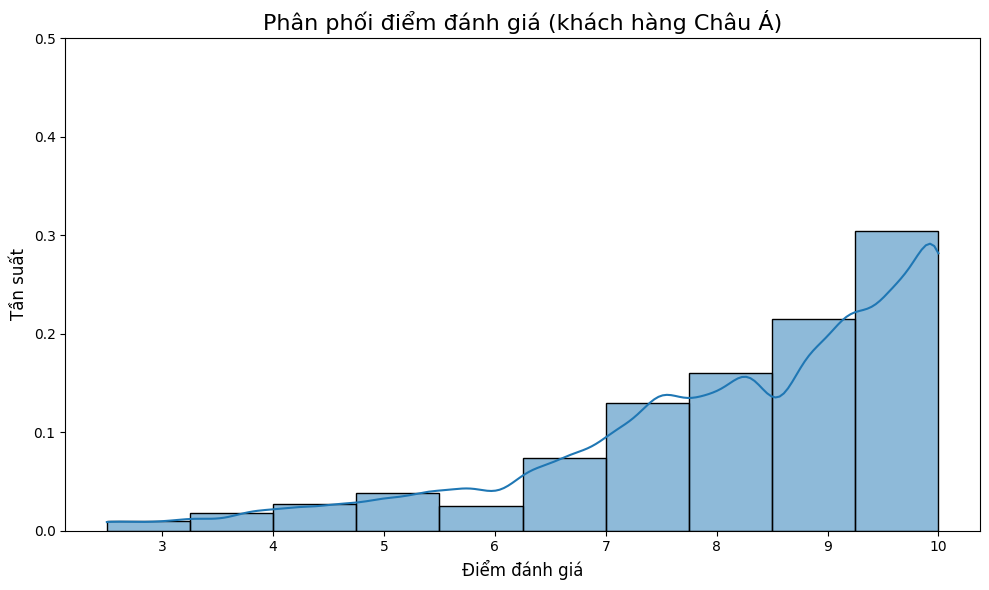

In [32]:
# Vẽ histogram cho Reviewer_Score
plt.figure(figsize=(10, 6))
sns.histplot(df_Asia['Reviewer_Score'], bins=10, kde=True, palette='Set2', stat='probability')

plt.title('Phân phối điểm đánh giá (khách hàng Châu Á)', fontsize=16)
plt.xlabel('Điểm đánh giá', fontsize=12)
plt.ylabel('Tần suất', fontsize=12)

plt.yticks(np.arange(0, 0.6, 0.1))
plt.tight_layout()
plt.show()

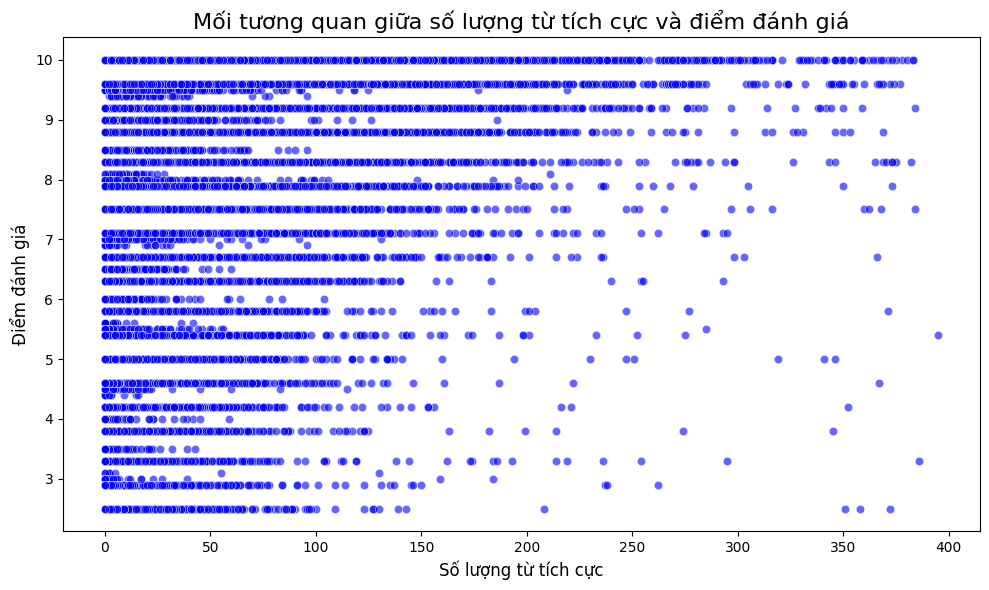

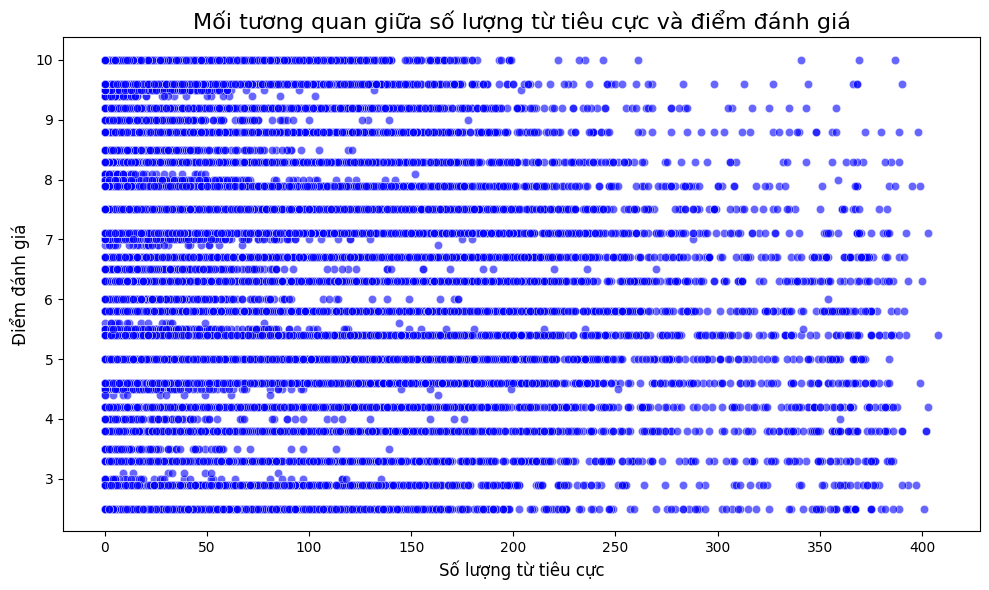

In [33]:
# Vẽ biểu đồ scatterplot giữa số lượng từ tích cực và Điểm đánh giá trung bình (Reviewer Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Review_Total_Positive_Word_Counts', y='Reviewer_Score', color='blue', alpha=0.6)

plt.title('Mối tương quan giữa số lượng từ tích cực và điểm đánh giá', fontsize=16)
plt.xlabel('Số lượng từ tích cực', fontsize=12)
plt.ylabel('Điểm đánh giá', fontsize=12)

plt.tight_layout()
plt.show()

# Vẽ biểu đồ scatterplot giữa số lượng từ tiêu cực và Điểm đánh giá trung bình (Reviewer Score)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_copy, x='Review_Total_Negative_Word_Counts', y='Reviewer_Score', color='blue', alpha=0.6)

plt.title('Mối tương quan giữa số lượng từ tiêu cực và điểm đánh giá', fontsize=16)
plt.xlabel('Số lượng từ tiêu cực', fontsize=12)
plt.ylabel('Điểm đánh giá', fontsize=12)

plt.tight_layout()
plt.show()

In [34]:
mean_score_p = shapiro(df_copy['Reviewer_Score']).pvalue
positive_ratio_p = shapiro(df_copy['Review_Total_Positive_Word_Counts']).pvalue

if mean_score_p > 0.05 and positive_ratio_p > 0.05:
    corr, p_value = pearsonr(df_copy['Reviewer_Score'], df_copy['Review_Total_Positive_Word_Counts'])
    method = "Pearson's correlation"
else:
    corr, p_value = spearmanr(df_copy['Reviewer_Score'], df_copy['Review_Total_Positive_Word_Counts'])
    method = "Spearman's rank correlation"

print(f"Kiểm định: {method}")
print(f"Hệ số tương quan: {corr:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Có mối tương quan có ý nghĩa thống kê giữa điểm đánh giá và số lượng từ tích cực.")
    if corr > 0:
        print("Mối tương quan thuận: khi số lượng từ tích cực tăng, điểm đánh giá cũng tăng.")
    elif corr < 0:
        print("Mối tương quan nghịch: khi số lượng từ tích cực tăng, điểm đánh giá giảm.")
    else:
        print("Mối tương quan gần bằng 0: không có mối liên hệ rõ rệt.")
else:
    print("Không có mối tương quan có ý nghĩa thống kê giữa điểm đánh giá trung bình và số lượng từ tích cực.")

Kiểm định: Spearman's rank correlation
Hệ số tương quan: 0.31, P-value: 0.0000
Có mối tương quan có ý nghĩa thống kê giữa điểm đánh giá và số lượng từ tích cực.
Mối tương quan thuận: khi số lượng từ tích cực tăng, điểm đánh giá cũng tăng.


In [35]:
mean_score_p = shapiro(df_copy['Reviewer_Score']).pvalue
positive_ratio_p = shapiro(df_copy['Review_Total_Positive_Word_Counts']).pvalue

if mean_score_p > 0.05 and positive_ratio_p > 0.05:
    corr, p_value = pearsonr(df_copy['Reviewer_Score'], df_copy['Review_Total_Negative_Word_Counts'])
    method = "Pearson's correlation"
else:
    corr, p_value = spearmanr(df_copy['Reviewer_Score'], df_copy['Review_Total_Negative_Word_Counts'])
    method = "Spearman's rank correlation"

print(f"Kiểm định: {method}")
print(f"Hệ số tương quan: {corr:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Có mối tương quan có ý nghĩa thống kê giữa điểm đánh giá và số lượng từ tiêu cực.")
    if corr > 0:
        print("Mối tương quan thuận: khi số lượng từ tiêu cực tăng, điểm đánh giá cũng tăng.")
    elif corr < 0:
        print("Mối tương quan nghịch: khi số lượng từ tiêu cực tăng, điểm đánh giá giảm.")
    else:
        print("Mối tương quan gần bằng 0: không có mối liên hệ rõ rệt.")
else:
    print("Không có mối tương quan có ý nghĩa thống kê giữa điểm đánh giá trung bình và số lượng từ tích cực.")

Kiểm định: Spearman's rank correlation
Hệ số tương quan: -0.47, P-value: 0.0000
Có mối tương quan có ý nghĩa thống kê giữa điểm đánh giá và số lượng từ tiêu cực.
Mối tương quan nghịch: khi số lượng từ tiêu cực tăng, điểm đánh giá giảm.


---
# **Trực quan hóa dữ liệu**

### __Biểu đồ 5.1. Số lượt đánh giá theo các quốc gia ở Châu Âu__

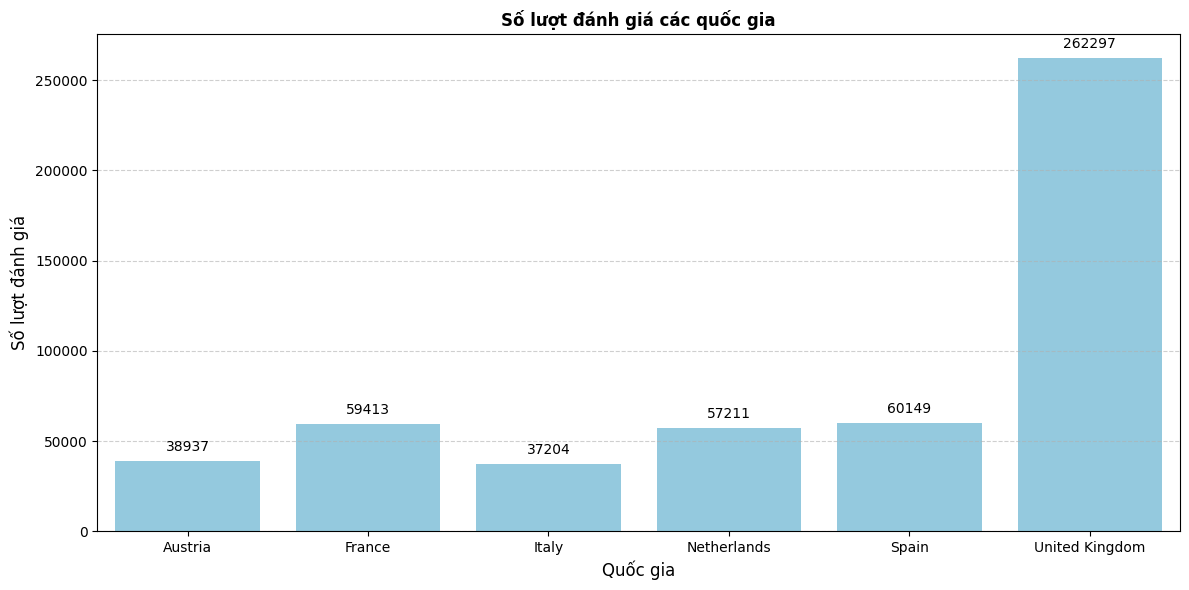

In [36]:
df_copy['Review_Date'] = pd.to_datetime(df_copy['Review_Date'])
df_copy['Year'] = df_copy['Review_Date'].dt.year
df_copy['Month'] = df_copy['Review_Date'].dt.month
grouped_data = df_copy.groupby(['Country']).size().reset_index(name='Review_Count')

plt.figure(figsize=(12, 6))
ax = sns.barplot(data=grouped_data, x='Country', y='Review_Count',color='skyblue')
for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 10), textcoords='offset points')
plt.title('Số lượt đánh giá các quốc gia', fontsize=12, fontweight='bold')
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Số lượt đánh giá', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### __Biểu đồ 5.2. Điểm trung bình từng quốc gia__

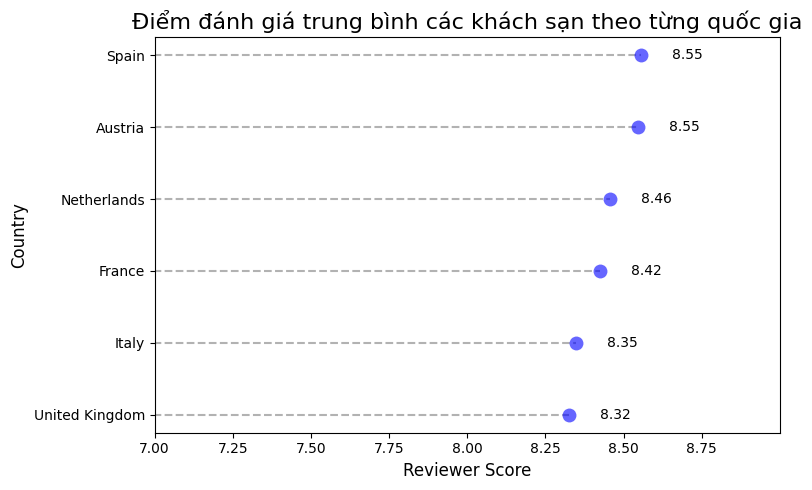

In [37]:
country_scores = df_copy[['Country', 'Reviewer_Score']].groupby('Country').mean().reset_index()

country_scores = country_scores.sort_values(by='Reviewer_Score', ascending=False).reset_index(drop=True)

min_score = country_scores['Reviewer_Score'].min()

plt.figure(figsize=(8, 5))
sns.stripplot(
    data=country_scores,
    x='Reviewer_Score',
    y='Country',
    jitter=True,
    size=10,
    color='blue',
    alpha=0.6
)

for i, row in country_scores.iterrows():
    plt.hlines(i, 0, row['Reviewer_Score'], colors='gray', linestyles='dashed', alpha=0.6)

    plt.text(row['Reviewer_Score'] + 0.1, i, f'{row["Reviewer_Score"]:.2f}', va='center', ha='left', fontsize=10)

plt.title('Điểm đánh giá trung bình các khách sạn theo từng quốc gia', fontsize=16)
plt.xlabel('Reviewer Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.xlim(min_score - 0.5, 9)
plt.xticks(ticks=np.arange(7, 9, 0.25))

plt.tight_layout()

plt.show()

### __Biểu đồ 5.3. Điểm đánh giá trung bình các khách sạn theo từng quốc gia (khách hàng Châu Á)__

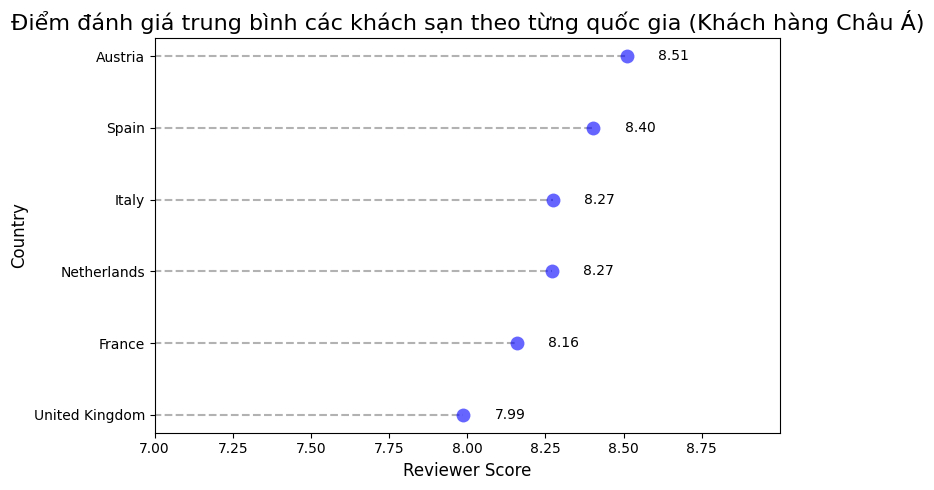

In [38]:
asia_customers = df_copy[df_copy['Reviewer_Regions'] == 'Asia']  
country_scores_asia = asia_customers[['Country', 'Reviewer_Score']].groupby('Country').mean().reset_index()

country_scores_asia = country_scores_asia.sort_values(by='Reviewer_Score', ascending=False).reset_index(drop=True)

min_score = country_scores_asia['Reviewer_Score'].min()

plt.figure(figsize=(8, 5))

sns.stripplot(
    data=country_scores_asia,
    x='Reviewer_Score',
    y='Country',
    jitter=True,
    size=10,
    color='blue',
    alpha=0.6
)

for i, row in country_scores_asia.iterrows():
    plt.hlines(i, 0, row['Reviewer_Score'], colors='gray', linestyles='dashed', alpha=0.6)

    plt.text(row['Reviewer_Score'] + 0.1, i, f'{row["Reviewer_Score"]:.2f}', va='center', ha='left', fontsize=10)

plt.title('Điểm đánh giá trung bình các khách sạn theo từng quốc gia (Khách hàng Châu Á)', fontsize=16)
plt.xlabel('Reviewer Score', fontsize=12)
plt.ylabel('Country', fontsize=12)

plt.xlim(min_score - 0.5, 9)
plt.xticks(ticks=np.arange(7, 9, 0.25))

plt.tight_layout()
plt.show()

### __Biểu đồ 5.4. Số lượt đánh giá theo tháng của từng quốc gia năm 2016__

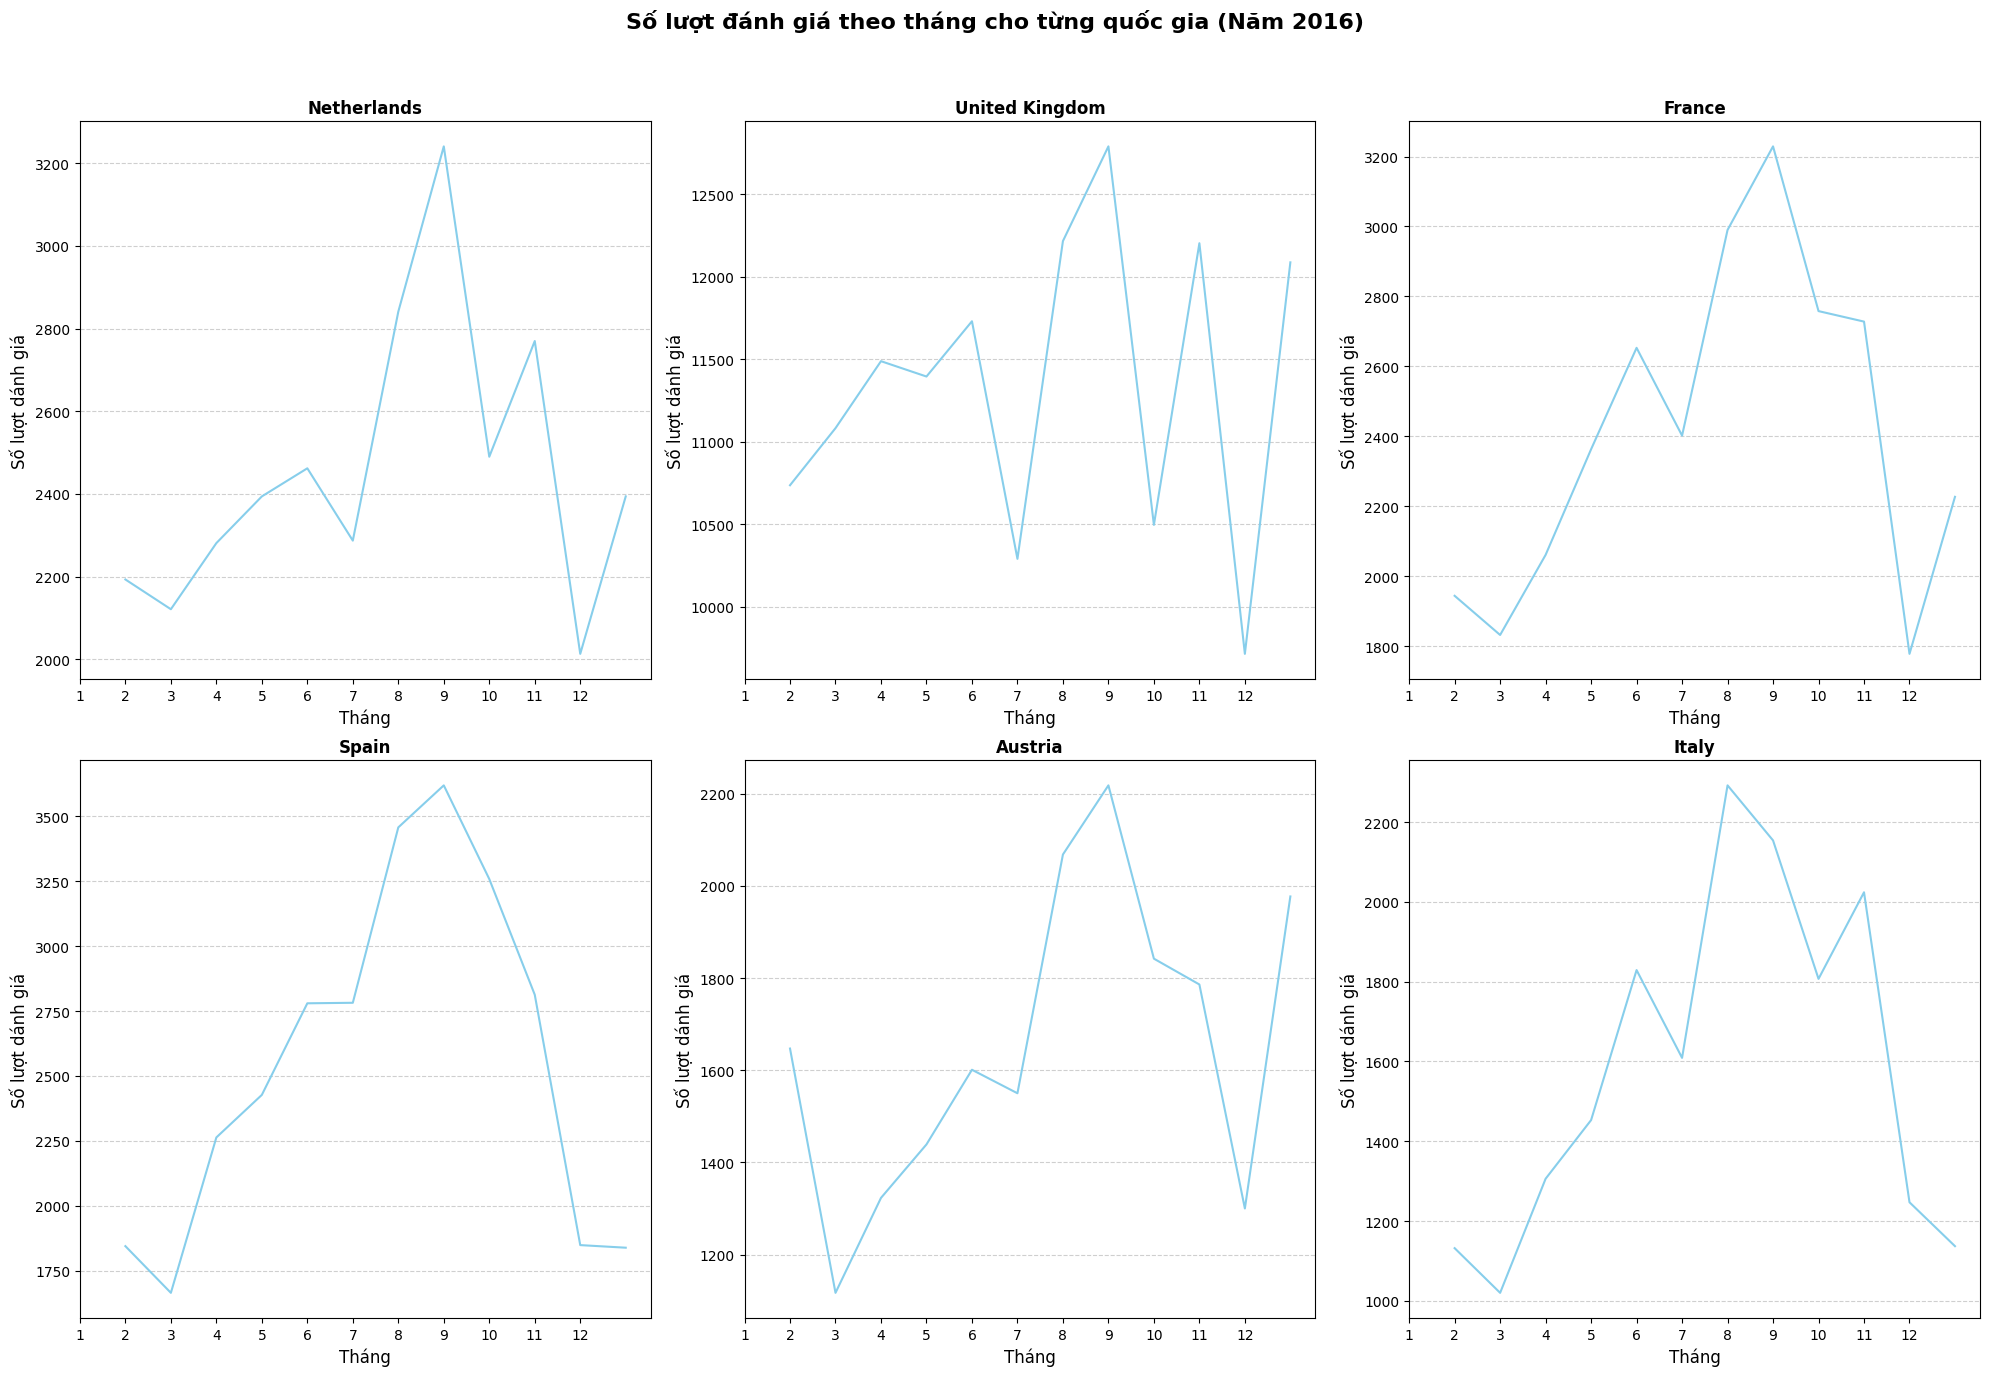

In [39]:
filtered_df = df_copy[df_copy['Year'] == 2016]
countries = filtered_df['Country'].unique()
fig, axes = plt.subplots(2, 3, figsize=(20,14), sharey=False)
axes = axes.flatten()
for idx, country in enumerate(countries):
    country_data = filtered_df[filtered_df['Country'] == country]
    monthly_data = country_data.groupby('Month').size().reset_index(name='Customer_Count')
    ax = axes[idx]
    sns.lineplot(data=monthly_data, x='Month', y='Customer_Count', color='skyblue', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black',
                    xytext=(0, 10), textcoords='offset points')
    ax.set_title(f'{country}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Tháng', fontsize=12)
    ax.set_ylabel('Số lượt dánh giá', fontsize=12)
    ax.set_xticks(range(0, 12))
    ax.set_xticklabels([f'{i+1}' for i in range(12)], fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.suptitle('Số lượt đánh giá theo tháng cho từng quốc gia (Năm 2016)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### __Biểu đồ 5.5. Hình thức chuyến đi theo từng quốc gia__

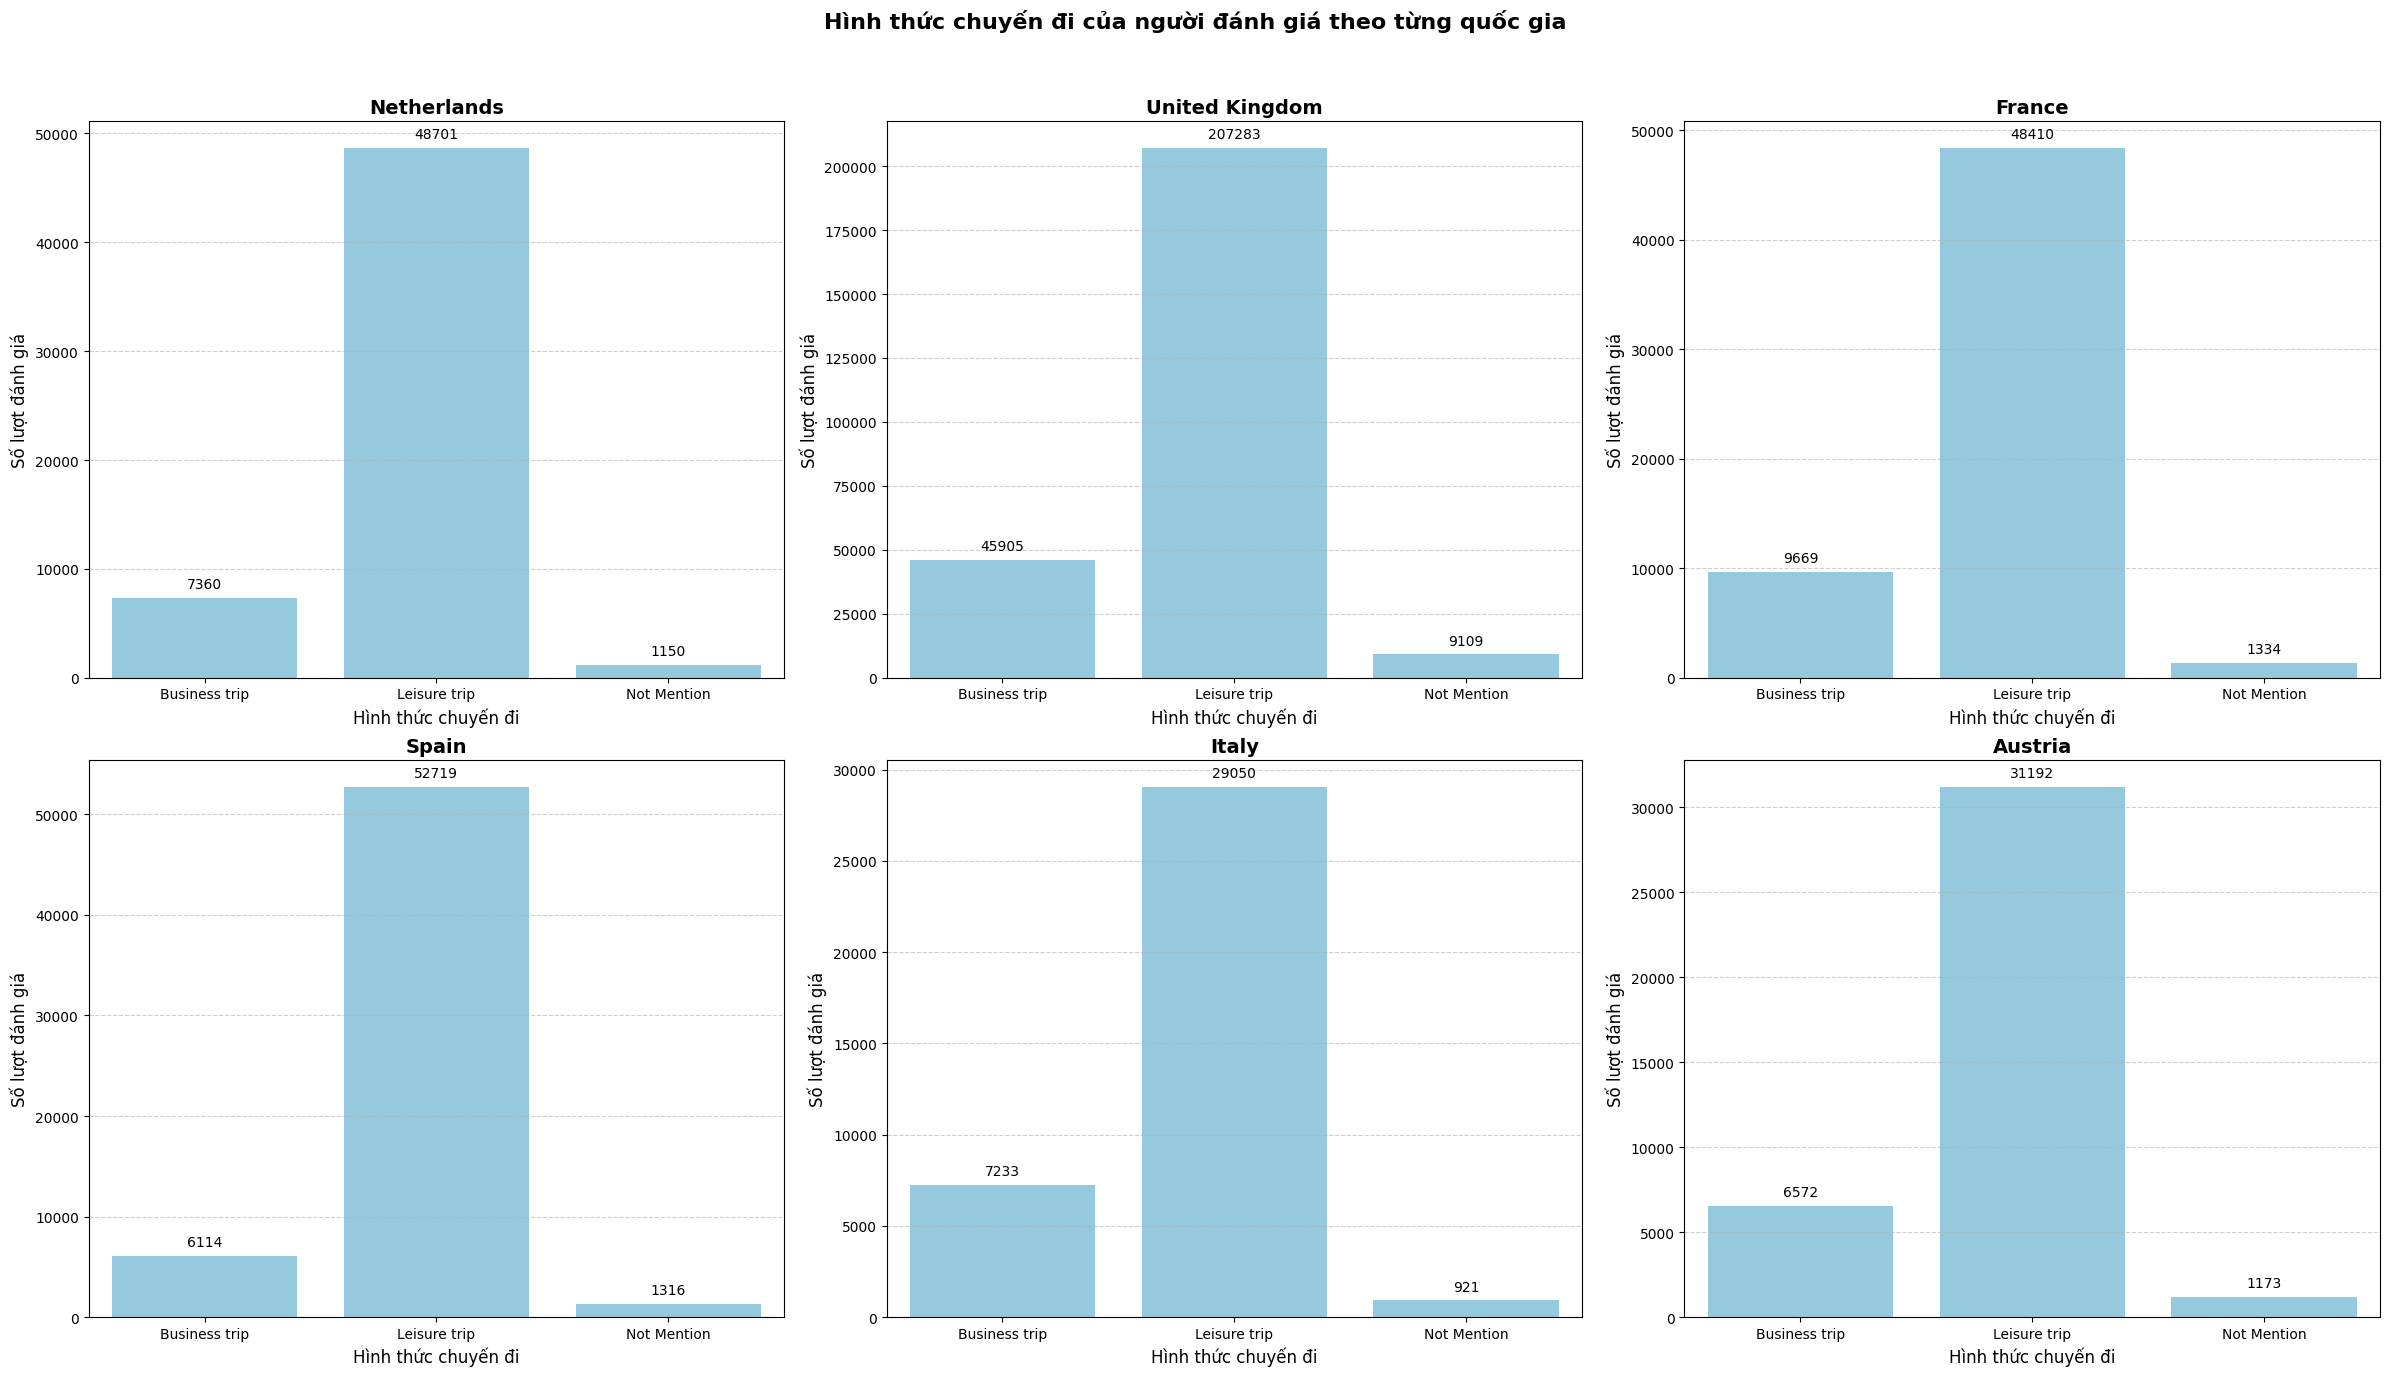

In [40]:
countries = df_copy['Country'].unique()
fig, axes = plt.subplots(2, 3, figsize=(24, 14), sharey=False)
axes = axes.flatten()
for idx, country in enumerate(countries):
    country_data = df_copy[df_copy['Country'] == country]
    trip_data = country_data.groupby('Trip_Type').size().reset_index(name='Customer_Count')
    ax = axes[idx]
    sns.barplot(data=trip_data, x='Trip_Type', y='Customer_Count', color='skyblue', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 10), textcoords='offset points')
    ax.set_title(f'{country}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Hình thức chuyến đi', fontsize=12)
    ax.set_ylabel('Số lượt đánh giá', fontsize=12)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.suptitle('Hình thức chuyến đi của người đánh giá theo từng quốc gia', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### __Biểu đồ 5.6. Nhóm theo hình thức chuyến đi của từng quốc gia năm 2016__

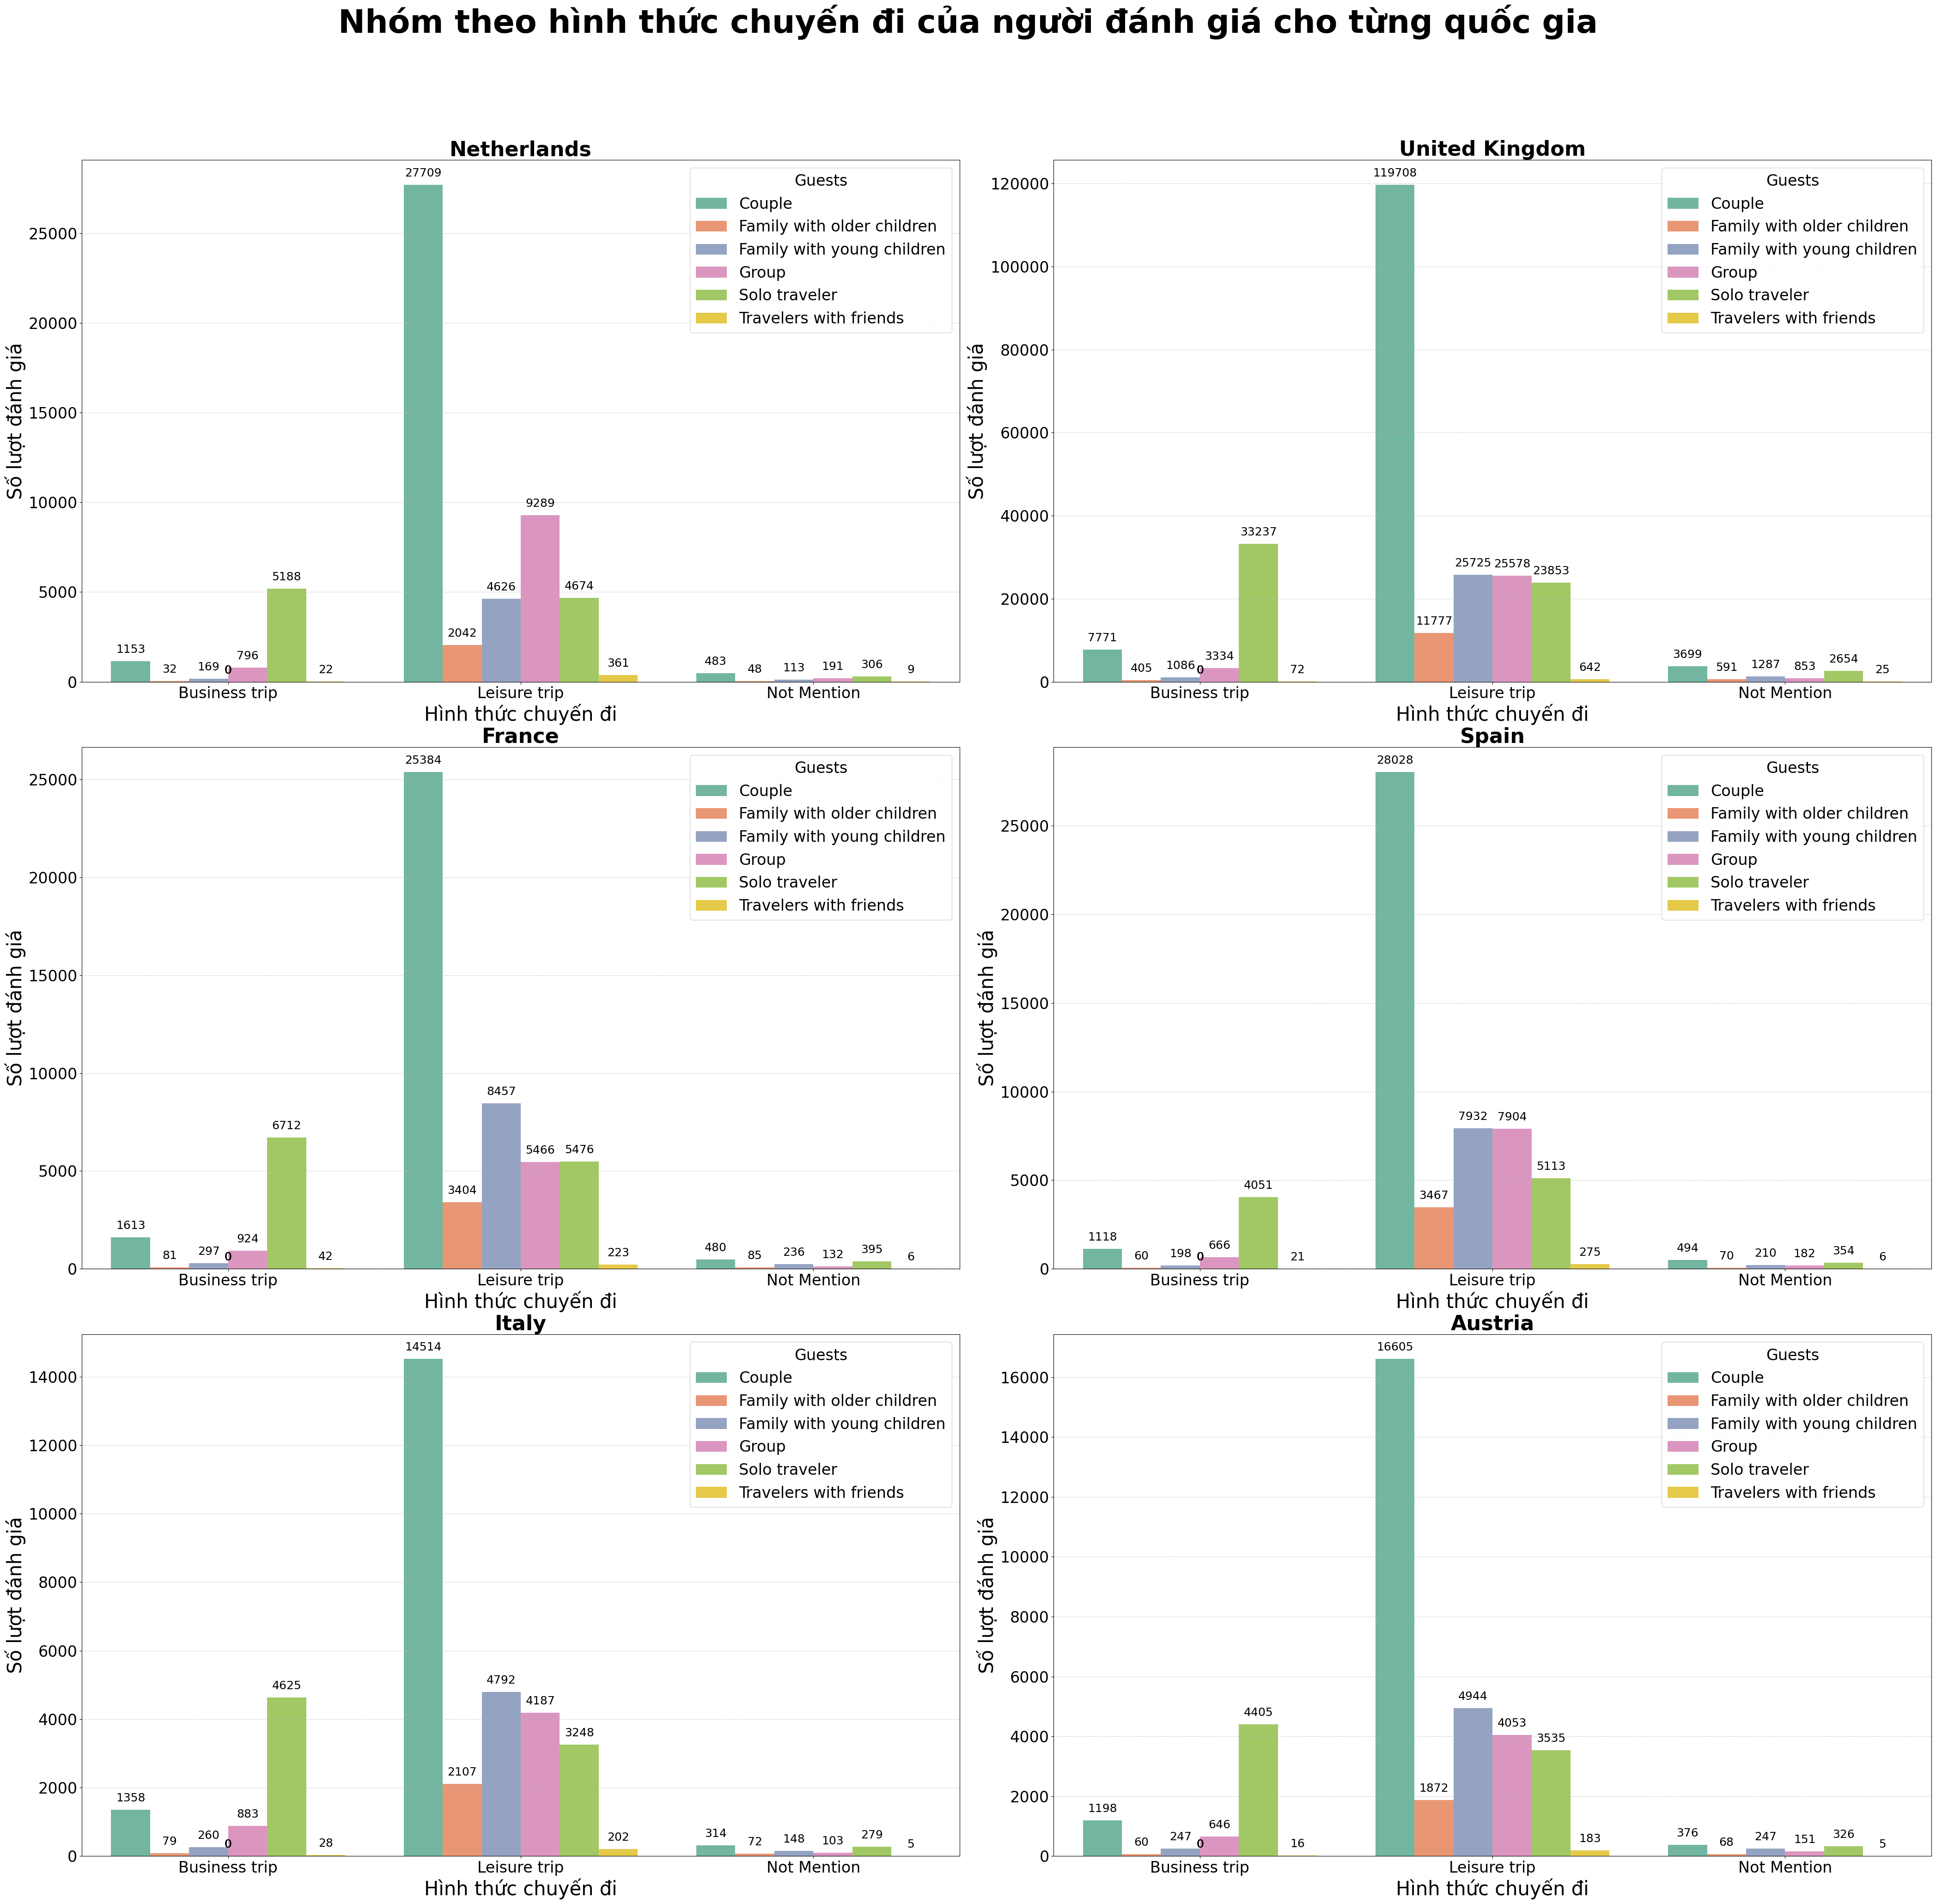

In [41]:
countries = df_copy['Country'].unique()
fig, axes = plt.subplots(3, 2, figsize=(42, 42), sharey=False)
axes = axes.flatten()
for idx, country in enumerate(countries):
    country_data = df_copy[df_copy['Country'] == country]
    trip_guest_data = country_data.groupby(['Trip_Type', 'Guests']).size().reset_index(name='Customer_Count')
    ax = axes[idx]
    sns.barplot(data=trip_guest_data, x='Trip_Type', y='Customer_Count', hue='Guests', palette='Set2', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=18, color='black', 
                    xytext=(0, 18), textcoords='offset points')
    ax.set_title(f'{country}', fontsize=32, fontweight='bold')
    ax.set_xlabel('Hình thức chuyến đi', fontsize=30)
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=24, rotation=0)
    ax.set_ylabel('Số lượt đánh giá', fontsize=30)
    ax.set_yticklabels(ax.get_yticklabels(), fontsize=24, rotation=0)
    ax.legend(title='Guests', title_fontsize=24, fontsize=24, loc='upper right')
    ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.suptitle("Nhóm theo hình thức chuyến đi của người đánh giá cho từng quốc gia", fontsize=50, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### __Hình 5.1. Top 3 khách sạn ở mỗi quốc gia__

In [42]:
hotel_ratings = df_copy.groupby(['Country','Hotel_Name']) \
    .agg({'Reviewer_Score': ['mean', 'count']}) \
    .reset_index()

hotel_ratings.columns = [ 'Quốc gia', 'Khách sạn','Điểm trung bình','Số đánh giá']

hotel_ratings = hotel_ratings[hotel_ratings['Số đánh giá'] >= 700]

hotel_ratings['Điểm trung bình'] = hotel_ratings['Điểm trung bình'].round(1)

hotel_ratings = hotel_ratings.sort_values(['Quốc gia', 'Điểm trung bình', 'Số đánh giá'], ascending=[True, False, False])
top_3_hotels = hotel_ratings.groupby('Quốc gia').head(3)
top_3_hotels

Quốc gia                                Khách sạn  \
104          Austria                           Hotel Stefanie   
22           Austria       Austria Trend Hotel Savoyen Vienna   
110          Austria                     Hotel de France Wien   
560           France                Pullman Paris Tour Eiffel   
579           France       Saint James Albany Paris Hotel Spa   
504           France         Mercure Paris Centre Tour Eiffel   
664            Italy                              Hotel Berna   
763            Italy                  The Square Milano Duomo   
657            Italy                              Glam Milano   
823      Netherlands                           Hotel Esther a   
835      Netherlands                            Jaz Amsterdam   
832      Netherlands  INK Hotel Amsterdam MGallery by Sofitel   
1047           Spain                       Olivia Plaza Hotel   
980            Spain                 Hotel Barcelona Catedral   
905            Spain                      Ayre Hotel Gran V a   
1253  United Kingdom           Intercontinental London The O2   
1364  United Kingdom     Shangri La Hotel at The Shard London   
1101  United Kingdom                 Amba Hotel Charing Cross   

      Điểm trung bình  Số đánh giá  
104               9.2          884  
22                8.9          713  
110               8.6          956  
560               8.6          846  
579               8.0          700  
504               7.9          770  
664               9.3         1052  
763               9.1          898  
657               8.7         1335  
823               9.3         1837  
835               9.0         1157  
832               9.0          876  
1047              9.4          773  
980               9.2          870  
905               8.8          797  
1253              9.5         2551  
1364              9.4         1113  
1101              9.4          785

### __Biểu đồ 5.7. Top 3 khách sạn có số lượng đánh giá cao nhất về dịch vụ cho phép mang thú cưng theo từng quốc gia__

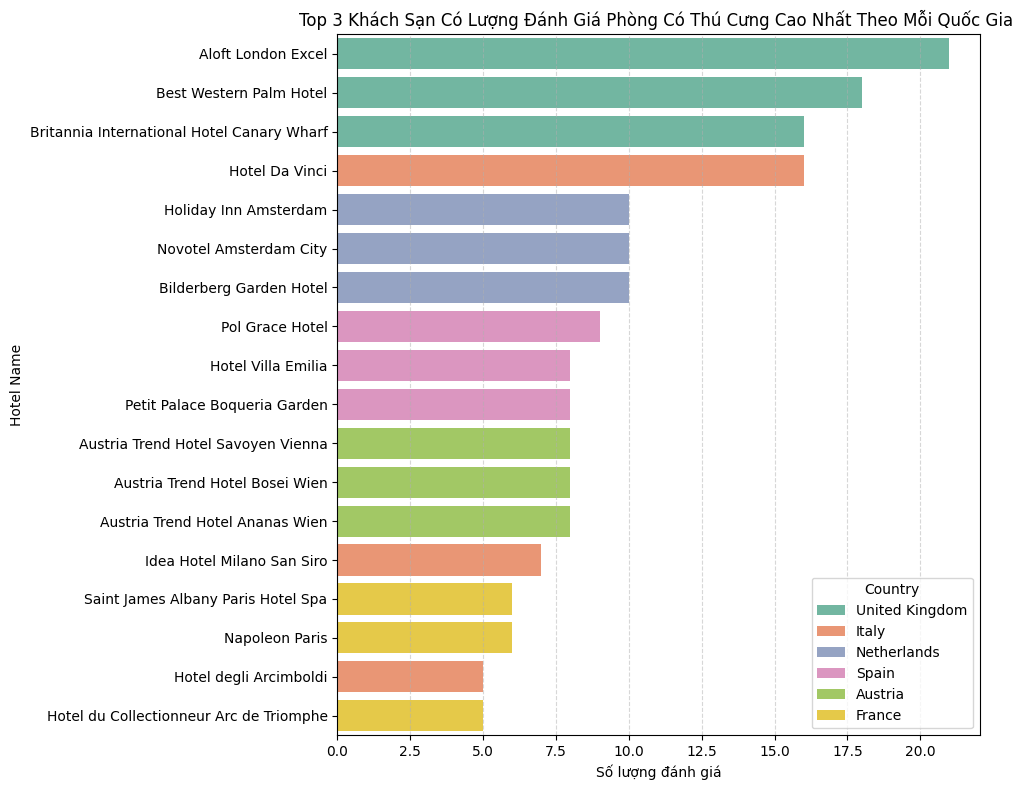

In [43]:
pet_df = df_copy[df_copy['With a pet'] == 'With a pet']

hotel_counts = pet_df.groupby(['Country', 'Hotel_Name'])['Hotel_Name'].count().reset_index(name='Review_Count')

def top_3_hotels(country_df):
    return country_df.nlargest(3, 'Review_Count')

top_hotels = hotel_counts.groupby('Country').apply(top_3_hotels).reset_index(drop=True)
desired_order = ['United Kingdom', 'Italy', 'Netherlands', 'Spain', 'Austria', 'France']

top_hotels['Country_Order'] = pd.Categorical(top_hotels['Country'], categories=desired_order, ordered=True)
top_hotels = top_hotels.sort_values('Country_Order')
top_hotels = top_hotels.sort_values(by=['Review_Count'], ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(y='Hotel_Name', x='Review_Count', hue='Country', data=top_hotels, palette='Set2')
plt.xlabel('Số lượng đánh giá')
plt.ylabel('Hotel Name')
plt.title('Top 3 Khách Sạn Có Lượng Đánh Giá Phòng Có Thú Cưng Cao Nhất Theo Mỗi Quốc Gia ')
plt.legend(title='Country')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### __Biểu đồ 5.8. Số đánh giá khách hàng Châu Á theo từng quốc gia__

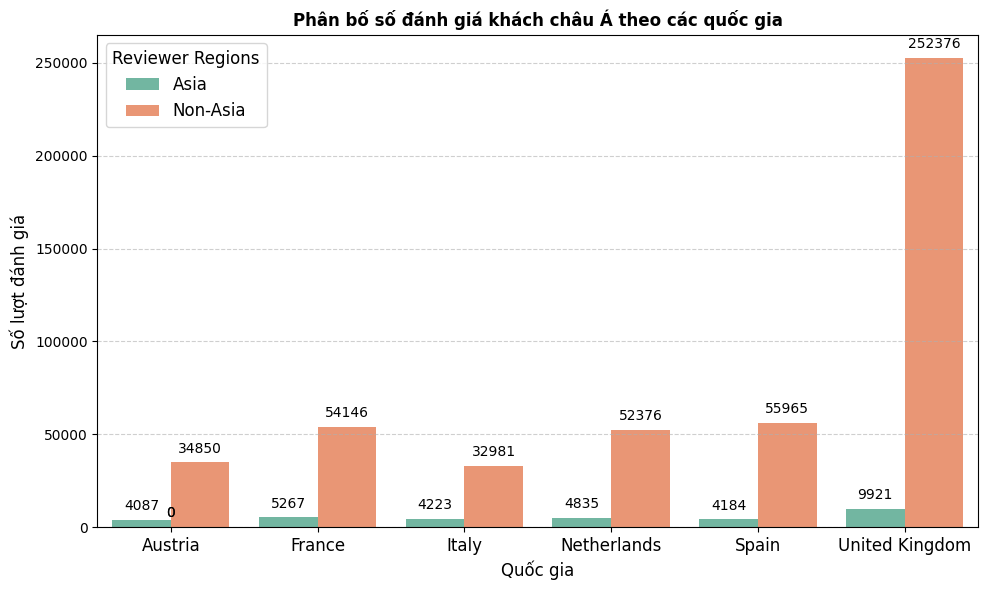

In [44]:
region_data = df_copy.groupby(['Country', 'Reviewer_Regions']).size().reset_index(name='Count')
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=region_data, x='Country', y='Count', hue='Reviewer_Regions', palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 10), textcoords='offset points')
plt.title('Phân bố số đánh giá khách châu Á theo các quốc gia', fontsize=12, fontweight='bold')
plt.xlabel('Quốc gia', fontsize=12)
plt.ylabel('Số lượt đánh giá', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=10)
plt.legend(title='Reviewer Regions', title_fontsize=12, fontsize=12, loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

### __Biểu đồ 5.9. Số đánh giá của người Châu Á theo tháng của từng quốc gia năm 2016__

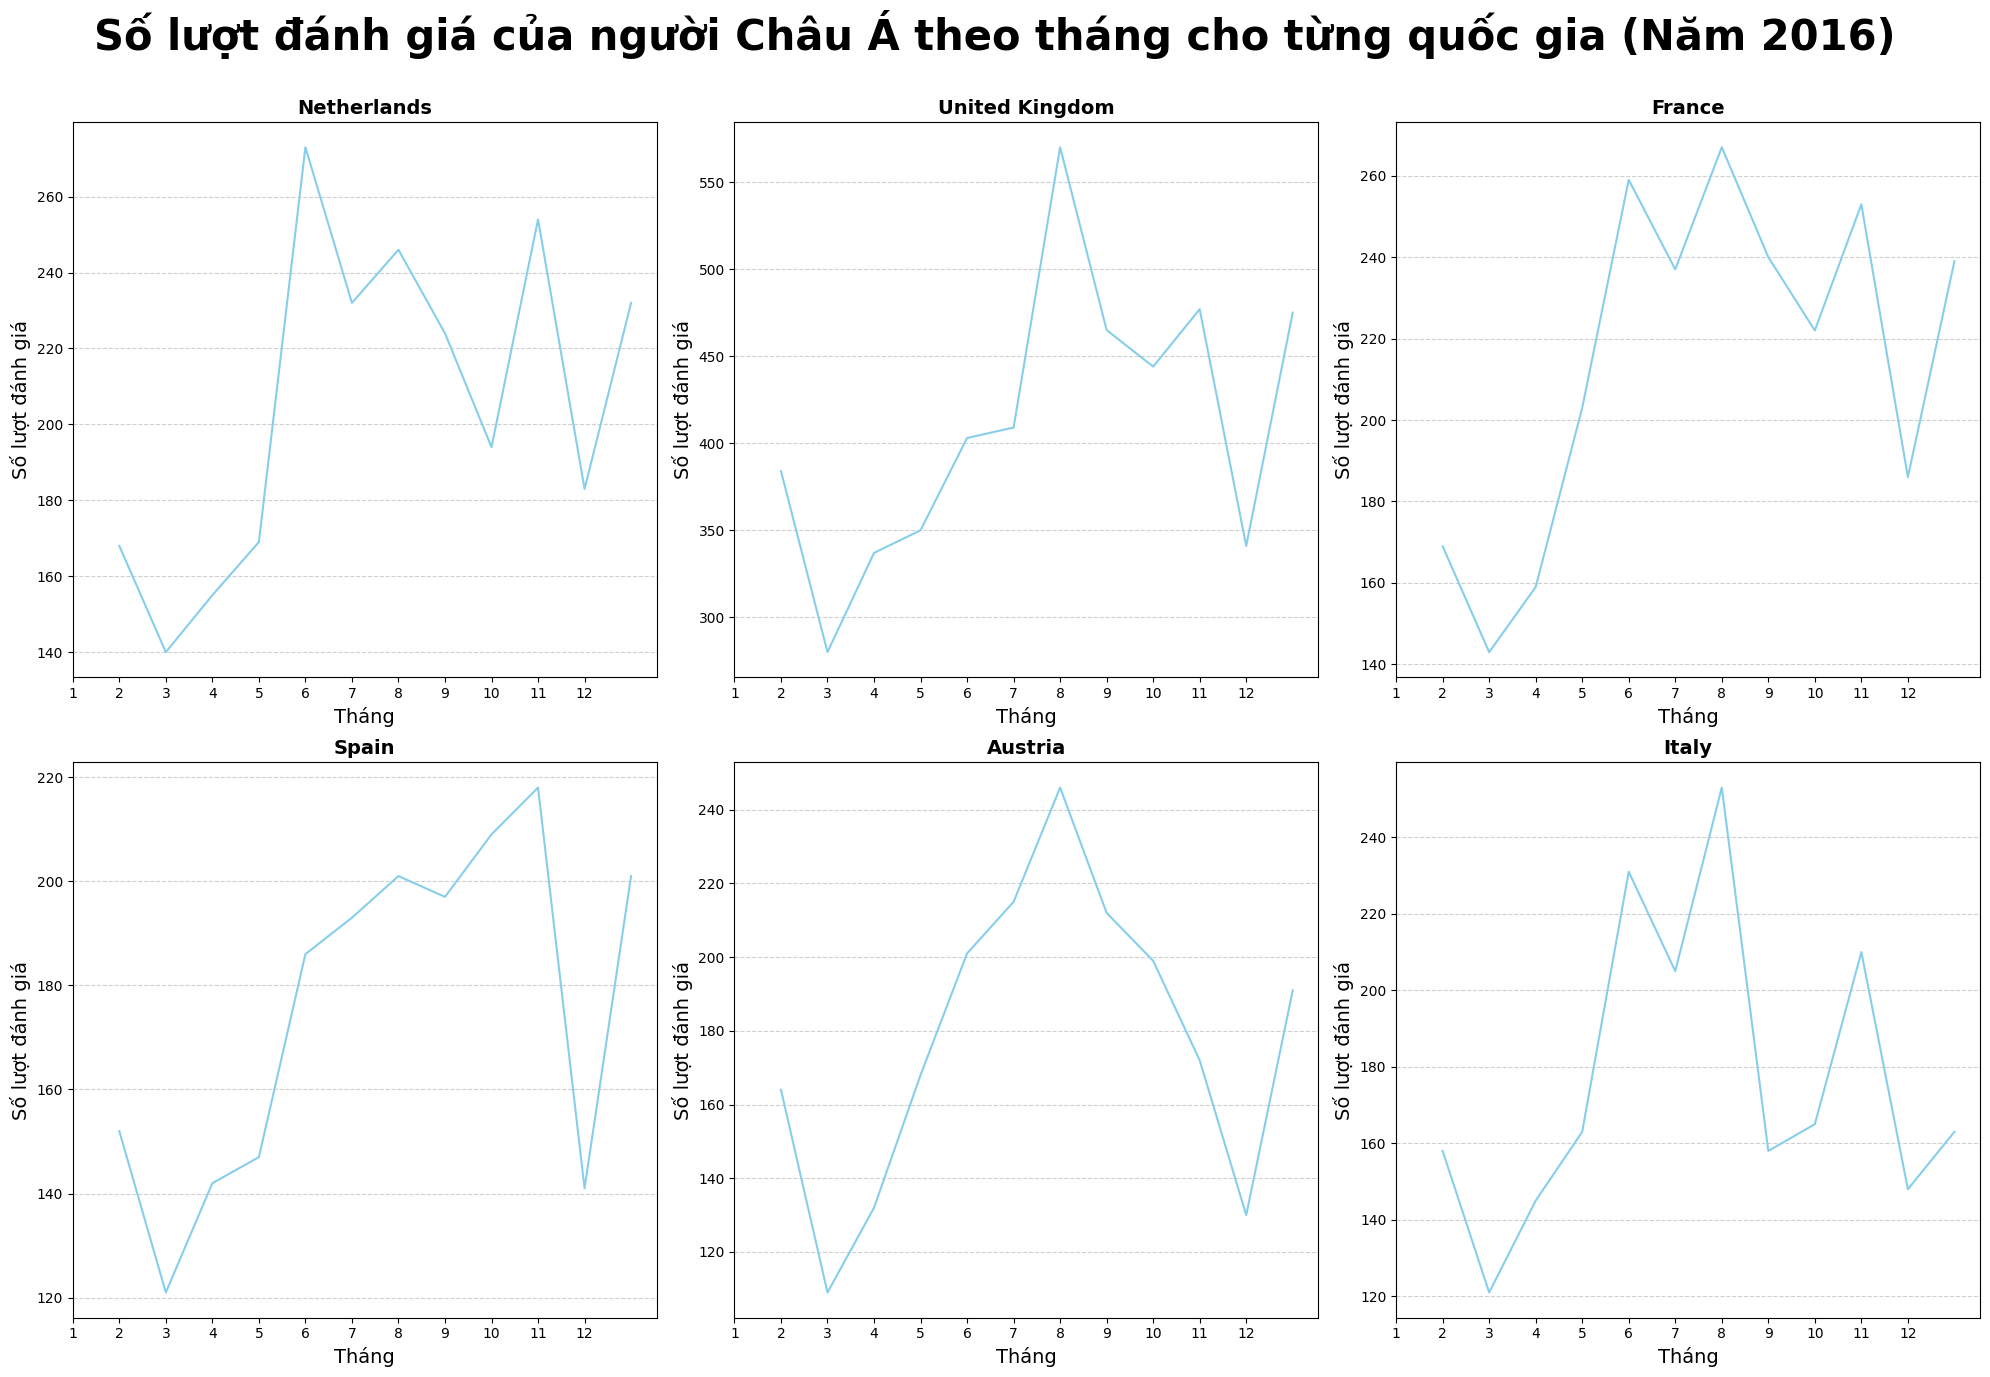

In [45]:
filtered_df_asian = df_copy[(df_copy['Year'] == 2016) & (df_copy['Reviewer_Regions'] == 'Asia')]
countries = filtered_df_asian['Country'].unique()
fig, axes = plt.subplots(2, 3, figsize=(20, 14), sharey=False)
axes = axes.flatten()
for idx, country in enumerate(countries):
    country_data = filtered_df_asian[filtered_df_asian['Country'] == country]
    monthly_data = country_data.groupby('Month').size().reset_index(name='Customer_Count')
    ax = axes[idx]
    sns.lineplot(data=monthly_data, x='Month', y='Customer_Count', color='skyblue', ax=ax)
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    fontsize=10, color='black', 
                    xytext=(0, 10), textcoords='offset points')
    ax.set_title(f'{country}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Tháng', fontsize=14)
    ax.set_ylabel('Số lượt đánh giá', fontsize=14)
    ax.set_xticks(range(0, 12))
    ax.set_xticklabels([f'{i+1}' for i in range(12)], fontsize=10)
    ax.grid(axis='y', linestyle='--', alpha=0.6)
fig.suptitle('Số lượt đánh giá của người Châu Á theo tháng cho từng quốc gia (Năm 2016)', fontsize=30, fontweight='bold')
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

### __Biểu đồ 5.10. Biểu đồ thể hiện số lượt đánh giá của du khách Châu Á và không phải Châu Á theo loại hình chuyến đi (Trip Type)__

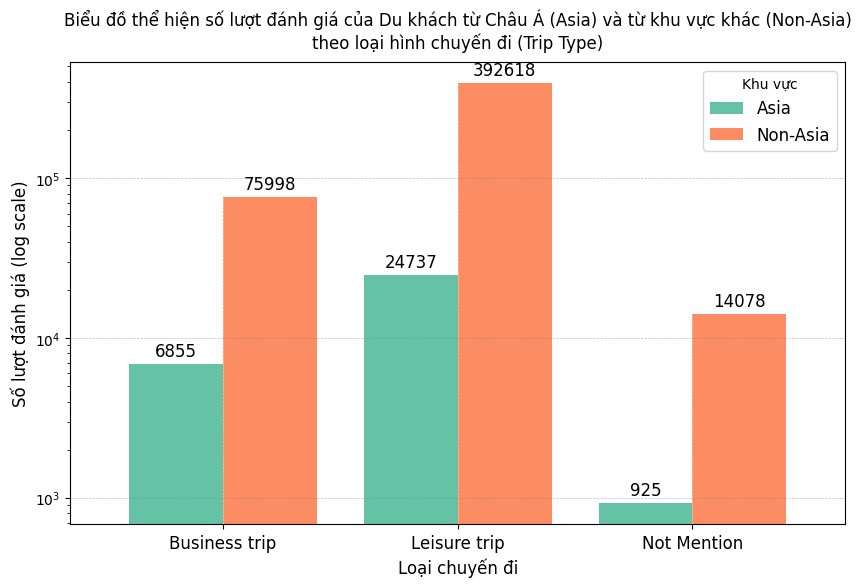

In [46]:
trip_distribution = df_copy.groupby(['Trip_Type', 'Reviewer_Regions']).size().unstack(fill_value=0)
ax = trip_distribution.plot(kind='bar',stacked=False,figsize=(10, 6) ,width=0.8, color=plt.cm.get_cmap('Set2').colors)
ax.set_yscale('log')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=12, padding=3)

plt.title('Biểu đồ thể hiện số lượt đánh giá của Du khách từ Châu Á (Asia) và từ khu vực khác (Non-Asia)\ntheo loại hình chuyến đi (Trip Type)', fontsize=12, pad=10)
plt.xlabel('Loại chuyến đi', fontsize=12)
plt.ylabel('Số lượt đánh giá (log scale)', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.legend(title='Khu vực', fontsize=12, bbox_to_anchor=(1, 1), loc='upper right')
plt.grid(axis='y',color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)

plt.grid(axis='x',color='white', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
plt.show()

### __Biểu đồ 5.11. Biểu đồ thể hiện số lượt đánh giá của du khách Châu Á và không phải Châu Á theo thông tin về loại khách__

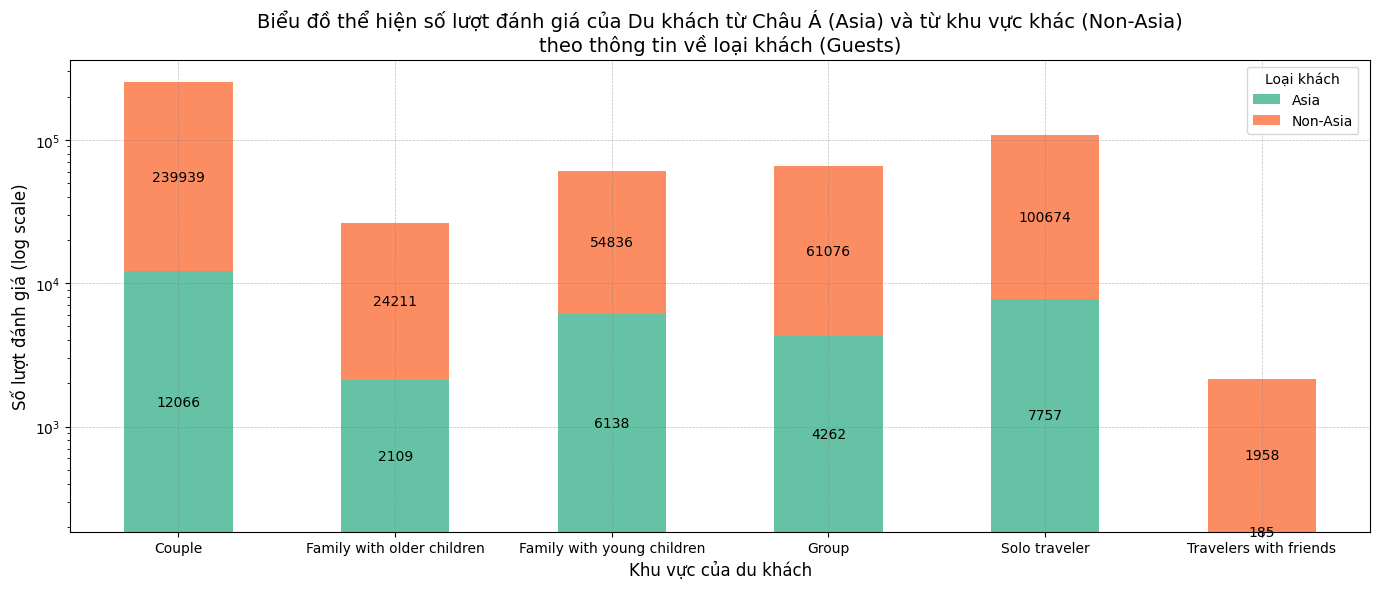

In [47]:
guest_distribution = df_copy.groupby(['Guests','Reviewer_Regions']).size().unstack(fill_value=0)

ax = guest_distribution.plot(kind='bar', stacked=True,figsize=(14, 6), color=plt.cm.get_cmap('Set2').colors)
ax.set_yscale('log')
for container in ax.containers:
    ax.bar_label(container, label_type='center', fontsize=10)

plt.title('Biểu đồ thể hiện số lượt đánh giá của Du khách từ Châu Á (Asia) và từ khu vực khác (Non-Asia)\ntheo thông tin về loại khách (Guests)', fontsize=14)
plt.xlabel('Khu vực của du khách', fontsize=12)
plt.ylabel('Số lượt đánh giá (log scale)', fontsize=12)
plt.xticks(rotation=0, fontsize=10)
plt.legend(title='Loại khách', fontsize=10, bbox_to_anchor=(0.9, 1), loc='upper left')
plt.tight_layout()
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
plt.show()

### __Biểu đồ 5.12. Biểu đồ thể hiện phân phối Điểm đánh giá của Du khách Châu Á__

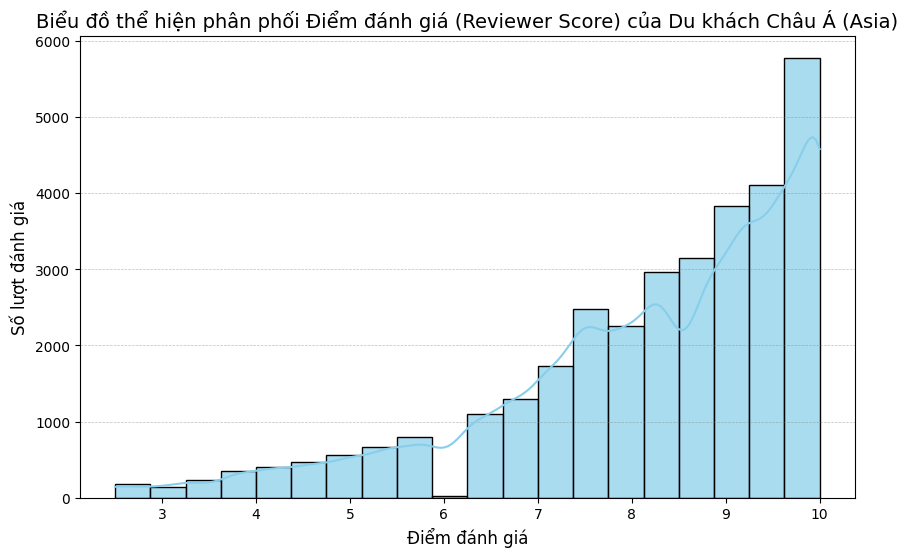

In [48]:
asia_scores = df_copy[df_copy['Reviewer_Regions'] == 'Asia']['Reviewer_Score']

plt.figure(figsize=(10, 6))
sns.histplot(asia_scores, bins=20, kde=True, color='skyblue', alpha=0.7)
plt.title('Biểu đồ thể hiện phân phối Điểm đánh giá (Reviewer Score) của Du khách Châu Á (Asia)', fontsize=14)
plt.xlabel('Điểm đánh giá', fontsize=12)
plt.ylabel('Số lượt đánh giá', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0)
plt.show()

### __Biểu đồ 5.13. Biểu đồ thể hiện phân phối Điểm đánh giá của Du khách từ khu vực khác__

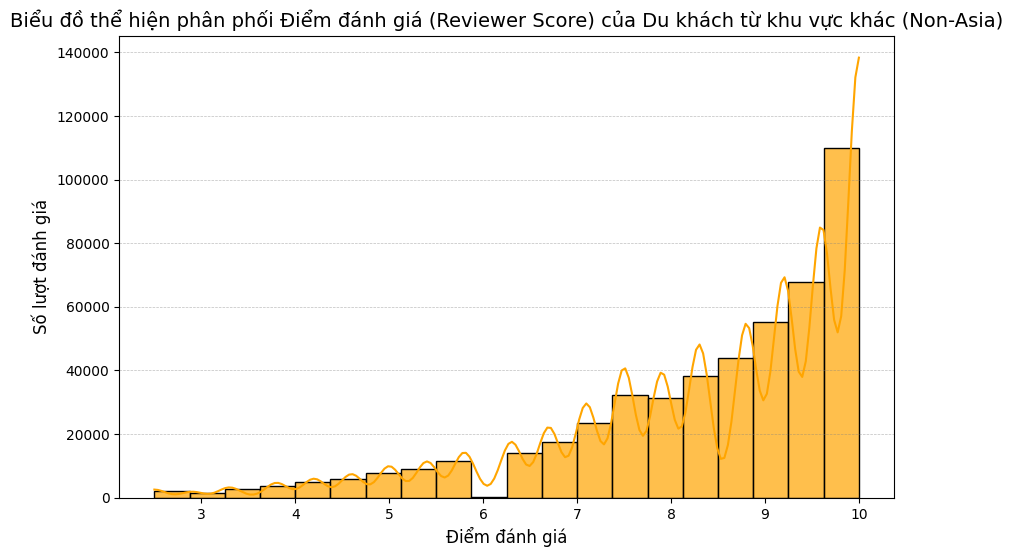

In [49]:
nonasia_scores = df_copy[df_copy['Reviewer_Regions'] == 'Non-Asia']['Reviewer_Score']

plt.figure(figsize=(10, 6))
sns.histplot(nonasia_scores, bins=20, kde=True, color='orange', alpha=0.7)
plt.title('Biểu đồ thể hiện phân phối Điểm đánh giá (Reviewer Score) của Du khách từ khu vực khác (Non-Asia)', fontsize=14)
plt.xlabel('Điểm đánh giá', fontsize=12)
plt.ylabel('Số lượt đánh giá', fontsize=12)
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.5, zorder=0) 
plt.show()

### __Hình 5.2. Top 3 khách sạn ở mỗi quốc gia đối với người Châu Á__

In [50]:
asian_countries = [
    "Afghanistan", "Armenia", "Azerbaijan", "Bangladesh", "Bhutan", "Brunei Darussalam", "Cambodia",
    "People's Republic of China", "Cyprus", "Georgia", "India", "Indonesia", "Iran", "Israel", "Japan",
    "Jordan", "Kazakhstan", "North Korea", "South Korea", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon",
    "Malaysia", "Maldives", "Mongolia", "Myanmar", "Nepal", "Oman", "Pakistan", "Philippines", "Qatar",
    "Saudi Arabia", "Singapore", "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey",
    "Turkmenistan", "United Arab Emirates", "Uzbekistan", "Vietnam", "Yemen"
]

asian_reviews = df_copy[df_copy['Reviewer_Nationality'].isin(asian_countries)]

asian_hotel_ratings = asian_reviews.groupby(['Country','Hotel_Name']) \
    .agg({'Reviewer_Score': ['mean', 'count']}) \
    .reset_index()

asian_hotel_ratings.columns = [ 'Quốc gia', 'Khách sạn','Điểm trung bình','Số đánh giá']

asian_hotel_ratings = asian_hotel_ratings[asian_hotel_ratings['Số đánh giá'] >= 150]

asian_hotel_ratings['Điểm trung bình'] = asian_hotel_ratings['Điểm trung bình'].round(1)

asian_hotel_ratings = asian_hotel_ratings.sort_values(['Quốc gia', 'Điểm trung bình', 'Số đánh giá'], ascending=[True, False, False])

asian_top_3_hotels = asian_hotel_ratings.groupby('Quốc gia').head(3)

asian_top_3_hotels

Quốc gia                                     Khách sạn  \
18           Austria               Austria Trend Hotel Europa Wien   
109          Austria                          Hotel de France Wien   
53           Austria                                 Hilton Vienna   
556           France                     Pullman Paris Tour Eiffel   
608           France  Warwick Paris Former Warwick Champs Elysees    
243           France               H tel California Champs Elys es   
744            Italy                              Room Mate Giulia   
660            Italy                                   Hotel Berna   
759            Italy                       The Square Milano Duomo   
877      Netherlands                            art otel Amsterdam   
872      Netherlands                             Urban Lodge Hotel   
870      Netherlands              The Student Hotel Amsterdam City   
1043           Spain                            Olivia Plaza Hotel   
1020           Spain               Majestic Hotel Spa Barcelona GL   
938            Spain               Eurostars Grand Marina Hotel GL   
1432  United Kingdom                      The Montcalm Marble Arch   
1098  United Kingdom                        Amba Hotel Marble Arch   
1347  United Kingdom                            Royal Garden Hotel   

      Điểm trung bình  Số đánh giá  
18                8.6          151  
109               8.2          168  
53                7.6          166  
556               8.3          179  
608               8.0          248  
243               7.9          150  
744               9.2          206  
660               9.2          150  
759               8.8          265  
877               8.9          173  
872               8.7          151  
870               8.6          227  
1043              9.3          219  
1020              8.7          155  
938               8.4          290  
1432              8.7          366  
1098              8.3          572  
1347              8.3          200

### __Biểu đồ 5.14. So sánh điểm đánh giá trung bình dựa trên số đêm khách hàng ở lại khách sạn__

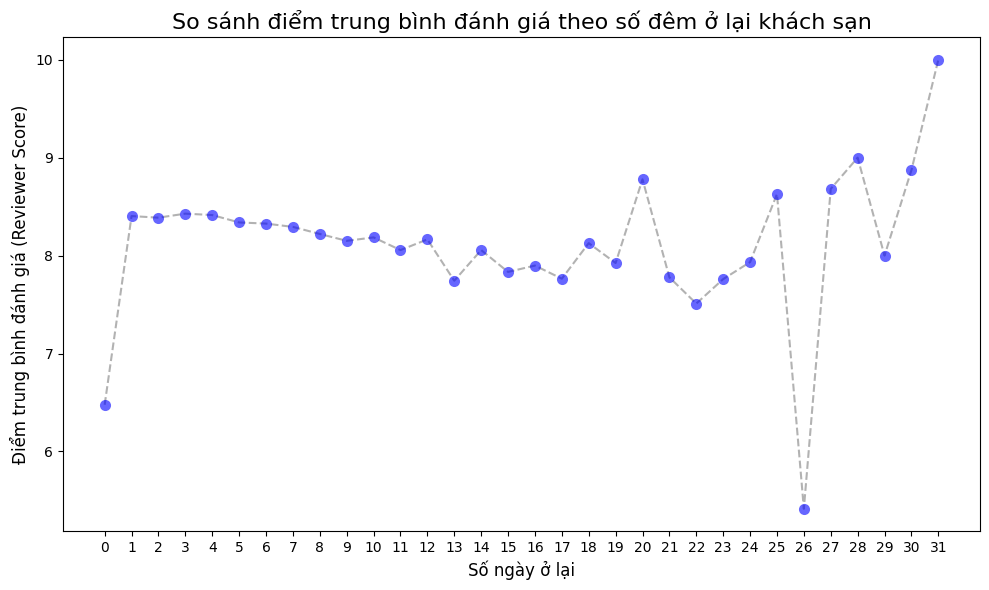

In [51]:
stay_scores = df_copy[['Stayed', 'Reviewer_Score']].groupby('Stayed').mean().reset_index()

plt.figure(figsize=(10, 6))

sns.stripplot(data=stay_scores, x='Stayed', y='Reviewer_Score', jitter=True, size=8, color='blue', alpha=0.6)

plt.plot(stay_scores['Stayed'], stay_scores['Reviewer_Score'], color='gray', linestyle='--', alpha=0.6)

plt.title('So sánh điểm trung bình đánh giá theo số đêm ở lại khách sạn', fontsize=16)
plt.xlabel('Số ngày ở lại', fontsize=12)
plt.ylabel('Điểm trung bình đánh giá (Reviewer Score)', fontsize=12)

plt.tight_layout()
plt.show()

### __Biểu đồ 5.15. So sánh điểm đánh giá trung bình dựa trên số đêm khách hàng Châu Á ở lại khách sạn theo từng quốc gia__

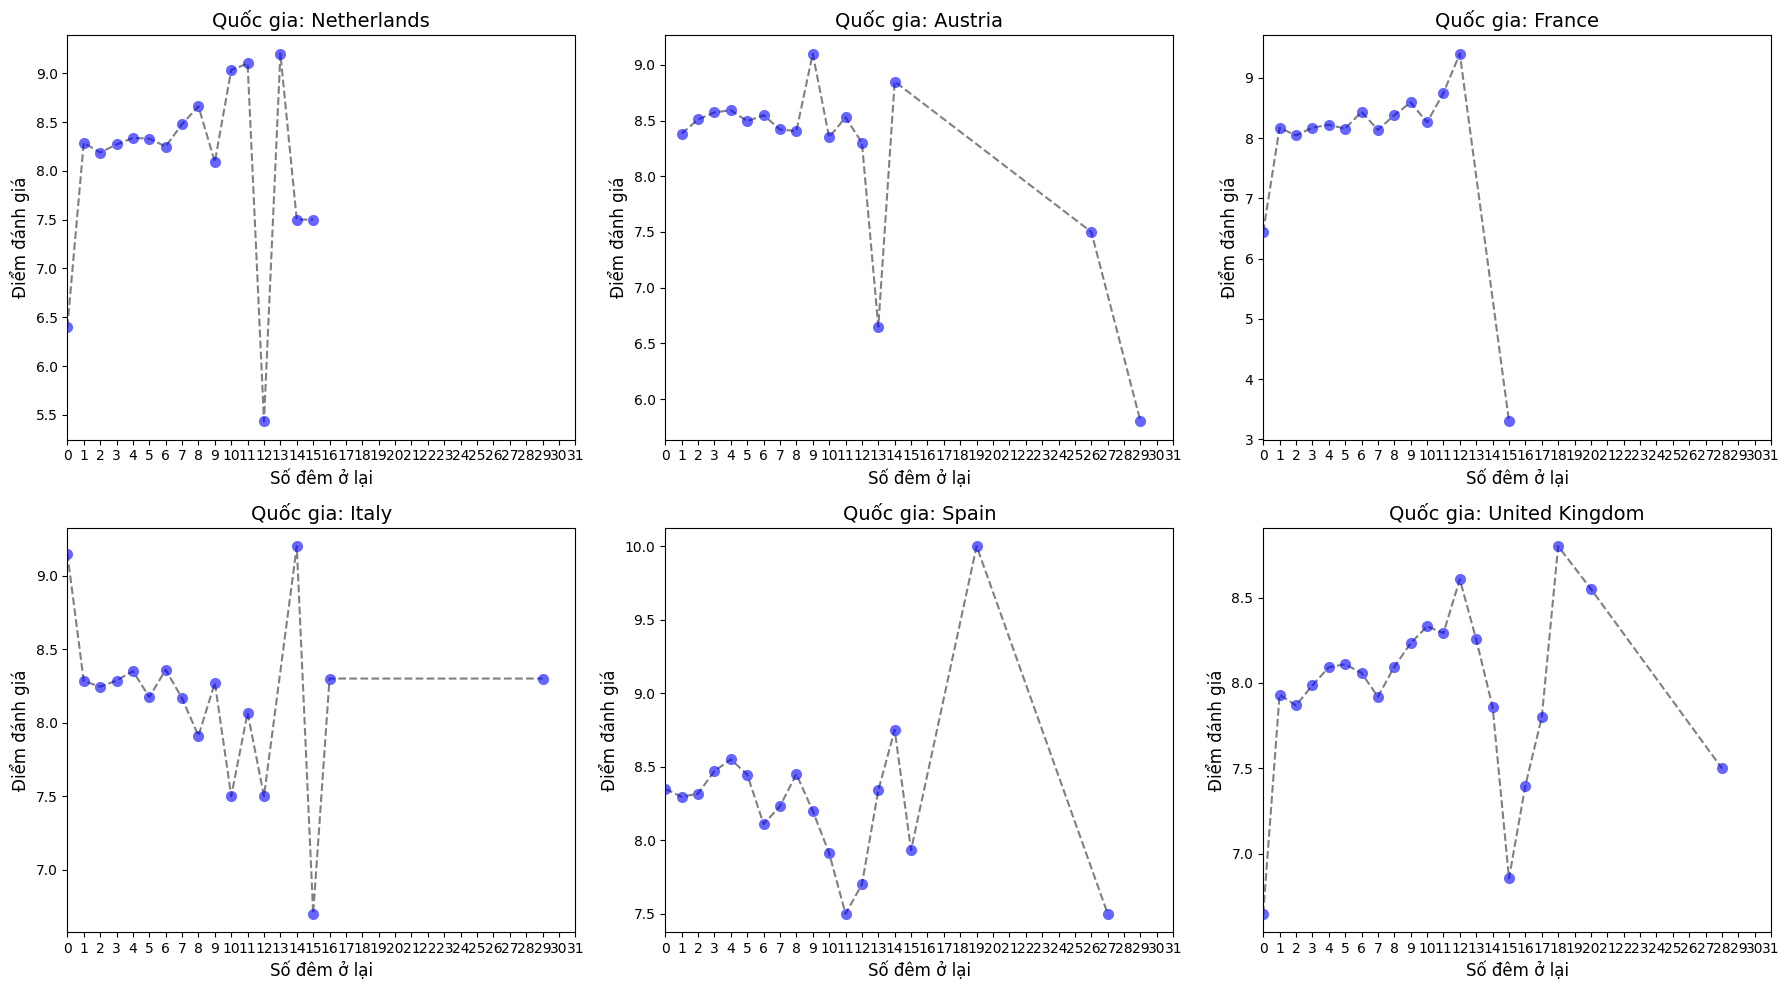

In [52]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

countries = ['Netherlands', 'Austria', 'France', 'Italy', 'Spain', 'United Kingdom']
dfs = [df_Netherlands, df_Austria, df_France, df_Italy, df_Spain, df_UK]

for i, (country, df) in enumerate(zip(countries, dfs)):
    ax = axes[i//3, i%3]

    stay_scores = df[['Stayed', 'Reviewer_Score']].groupby('Stayed').mean().reset_index()

    x_values = np.arange(0, 32, 1)

    stay_scores_full = pd.DataFrame({'Stayed': x_values})
    stay_scores_full = pd.merge(stay_scores_full, stay_scores, on='Stayed', how='left')

    sns.stripplot(data=stay_scores_full, x='Stayed', y='Reviewer_Score', jitter=True, size=8, color='blue', alpha=0.6, ax=ax)

    sns.lineplot(data=stay_scores_full, x='Stayed', y='Reviewer_Score', color='gray', linestyle='--', ax=ax)

    ax.set_title(f'Quốc gia: {country}', fontsize=14)
    ax.set_xlabel('Số đêm ở lại', fontsize=12)
    ax.set_ylabel('Điểm đánh giá', fontsize=12)
    
    ax.set_xlim(0, 31)
    ax.set_xticks(np.arange(0, 32, 1))

plt.tight_layout()

plt.show()

### __Biểu đồ 5.16. Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Của Người Châu Á Tại Các Quốc Gia__

#### __Trích keyword__

In [53]:
# Tạo từ điển chứa các comment của người Châu Á theo quốc gia
country_reviews = {}
for index, row in df_copy.iterrows():
    if row['Reviewer_Regions'] == 'Asia':
        country = row['Country']
        if country not in country_reviews:
            country_reviews[country] = {'Negative_Review': [], 'Positive_Review': []}

        if pd.notna(row['Negative_Review']):
            country_reviews[country]['Negative_Review'].append(row['Negative_Review'])
        if pd.notna(row['Positive_Review']):
            country_reviews[country]['Positive_Review'].append(row['Positive_Review'])

In [54]:
# Hàm lọc: token, stopword, chỉ giữ lại danh từ
def remove_stopwords(comments):
    filtered_comments = []
    for comment in comments:
        # Tokenize
        words = word_tokenize(str(comment).lower())

        #POS tag
        tagged_words = pos_tag(words)

        # Giữ lại danh từ
        filtered_words = [
            lemmatizer.lemmatize(word) for word, tag in tagged_words
            if word.isalpha() and word not in stop_words and tag.startswith('NN')
        ]

        filtered_comments.append(" ".join(filtered_words))
    return filtered_comments

In [55]:
for country, reviews in country_reviews.items():
    country_reviews[country]['Negative_Review'] = remove_stopwords(reviews['Negative_Review'])
    country_reviews[country]['Positive_Review'] = remove_stopwords(reviews['Positive_Review'])

In [56]:
# Hàm đếm tần số
def calculate_word_frequencies(reviews):
    all_words = " ".join(reviews).split()
    return Counter(all_words)

In [57]:
# Tính tần số
country_word_frequencies = {}

for country, reviews in country_reviews.items():
    neg_reviews = reviews['Negative_Review']
    pos_reviews = reviews['Positive_Review']

    neg_freq = calculate_word_frequencies(neg_reviews)
    pos_freq = calculate_word_frequencies(pos_reviews)

    # Lưu lại vào dict
    country_word_frequencies[country] = {
        'Negative': neg_freq,
        'Positive': pos_freq
    }

#### __Vẽ biểu đồ__

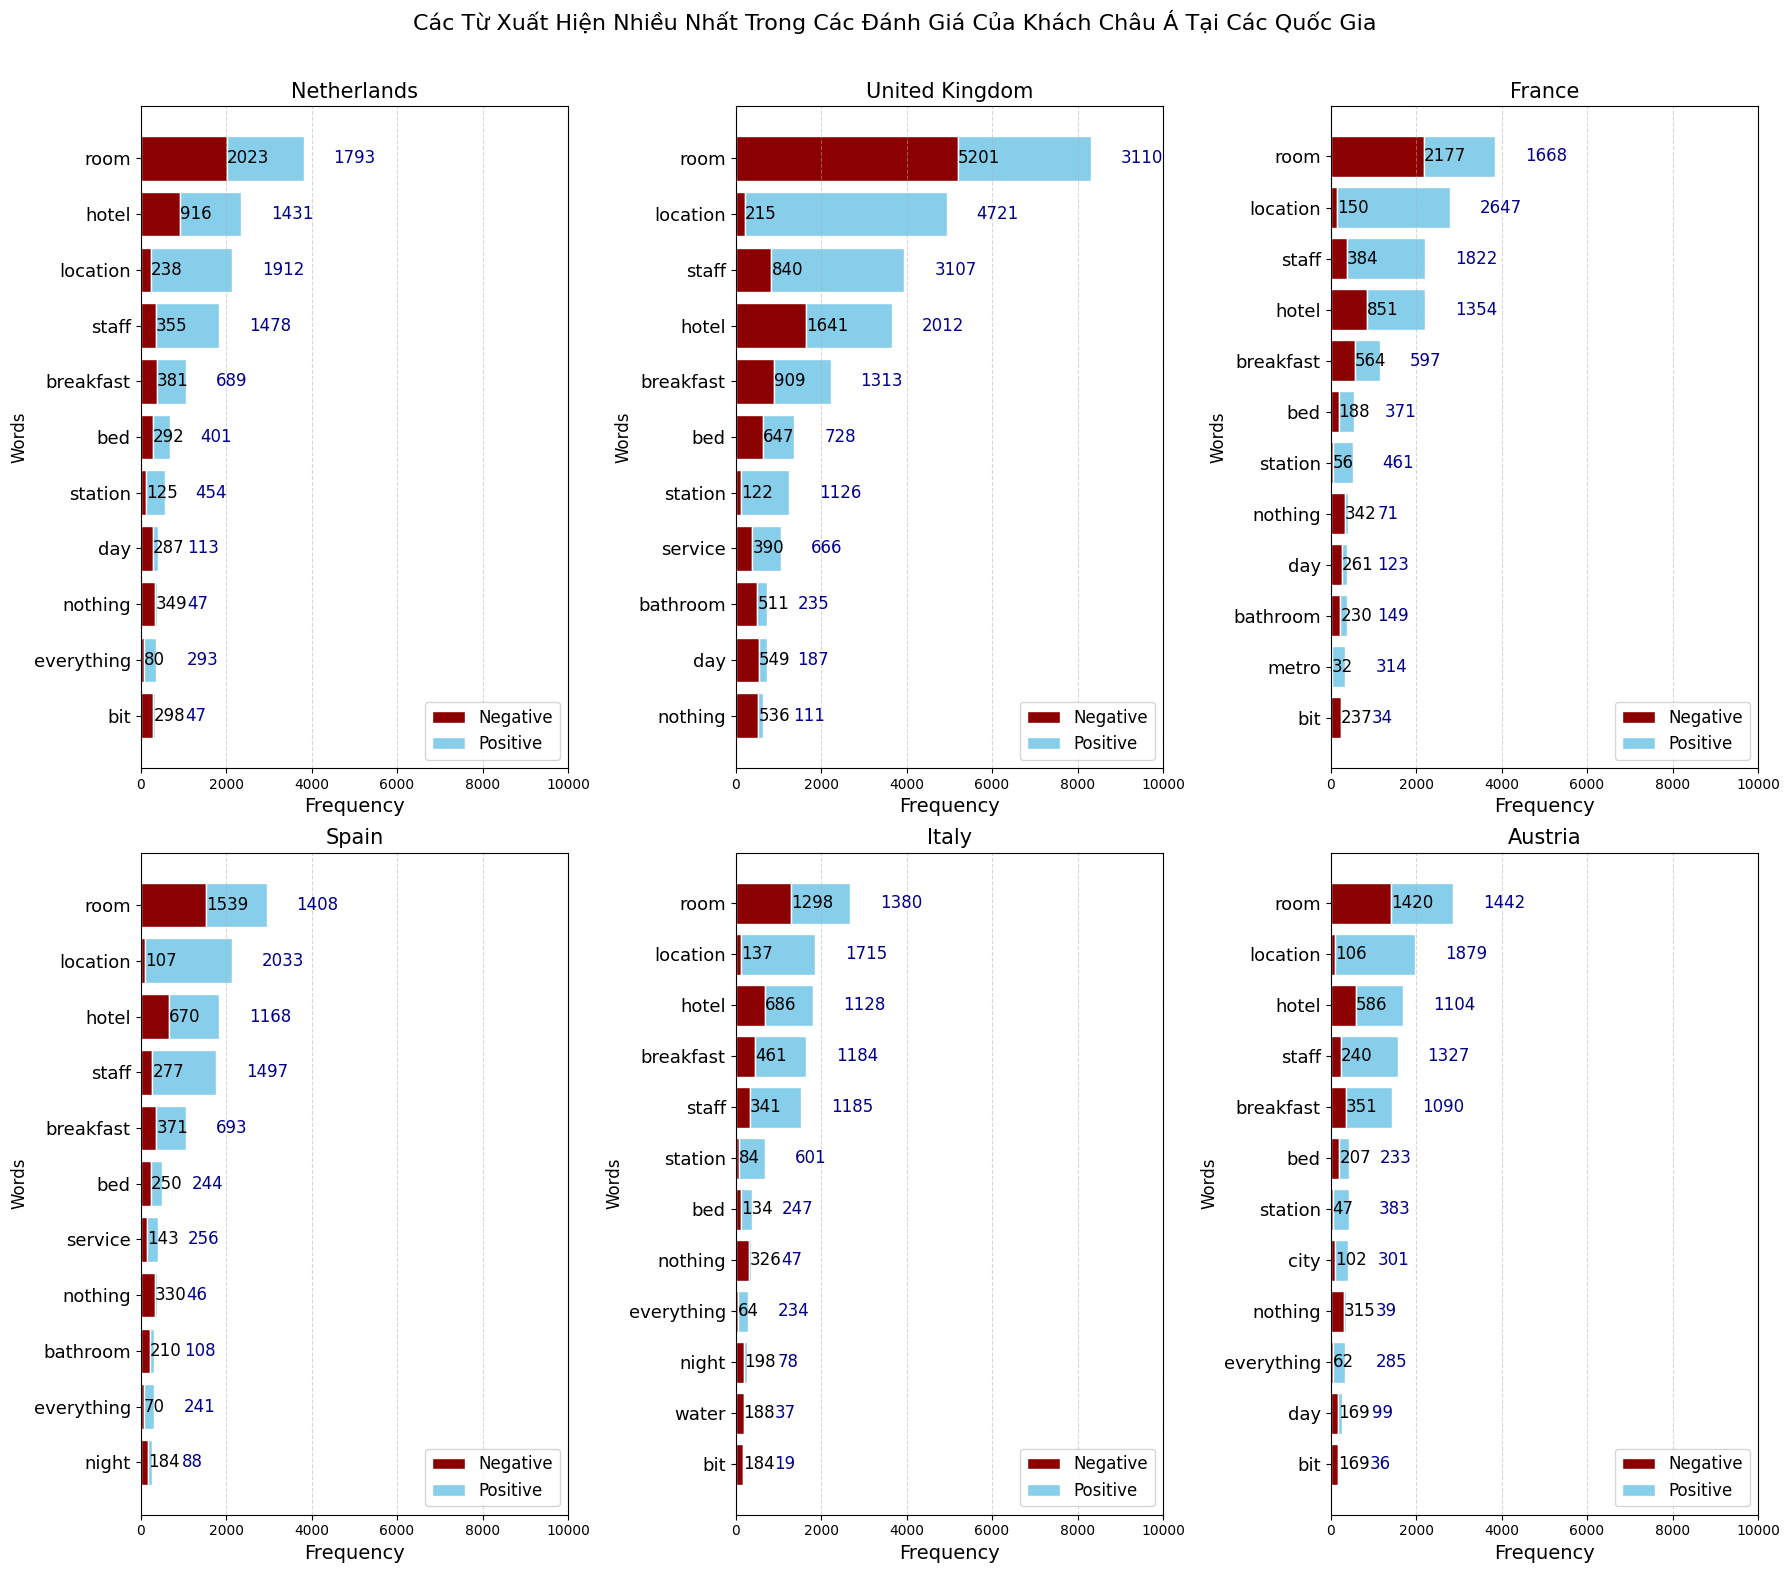

In [58]:
# Vẽ subplot
fig, axes = plt.subplots(2, 3, figsize=(18, 16))
axes = axes.flatten()

plot_idx = 0

for country, freq_data in country_word_frequencies.items():
    # Lấy 8 từ phổ biến nhất từ cả tiêu cực và tích cực
    common_neg = freq_data['Negative'].most_common(8)
    common_pos = freq_data['Positive'].most_common(8)

    words = list(set([word for word, _ in common_neg + common_pos]))
    neg_values = [freq_data['Negative'][word] for word in words]
    pos_values = [freq_data['Positive'][word] for word in words]

    # Tạo DataFrame
    df_asia = pd.DataFrame({
        'Word': words,
        'Negative': neg_values,
        'Positive': pos_values
    })

    # Tính tổng và sắp xếp theo tổng
    df_asia['Total'] = df_asia['Negative'] + df_asia['Positive']
    df_asia = df_asia.sort_values(by='Total')

    #
    ax = axes[plot_idx]
    plot_idx += 1

    # Vẽ stacked bar chart
    bar_width = 0.5
    indices = range(len(df_asia))

    ax.barh(indices, df_asia['Negative'], color='darkred', label='Negative', edgecolor='white')
    ax.barh(indices, df_asia['Positive'], left=df_asia['Negative'], color='skyblue', label='Positive', edgecolor='white')

    # Thêm giá trị
    for i in indices:
        neg_width = df_asia['Negative'].iloc[i]
        pos_width = df_asia['Positive'].iloc[i]

        ax.text(neg_width, i, str(neg_width), va='center', color='black', fontsize=12)
        ax.text(neg_width + pos_width+ 700, i, str(pos_width), va='center', color='darkblue', fontsize=12)

    # Cài đặt tiêu đề và nhãn cho mỗi subplot
    ax.set_xlim(0, 10000)
    ax.set_yticks(indices)
    ax.set_yticklabels(df_asia['Word'], fontsize=13)
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Words", fontsize=12)
    ax.set_title(f"{country}", fontsize=15)
    ax.legend(loc= 'lower right', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

# Add a main title for the whole figure
plt.suptitle('Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Của Khách Châu Á Tại Các Quốc Gia', fontsize=16, )

# Adjust layout
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### __Biểu đồ 5.17. Các từ xuất hiện nhiều nhất trong các đánh giá của khách Châu Á cho các khách sạn tại Tây Ban Nha__

#### __Tiền xử lý__

In [59]:
def top_3_hotels_by_country(df, country):
    filtered_df = df[(df['Reviewer_Regions'] == 'Asia') & (df['Country'] == country)]
    hotel_comment_counts = filtered_df.groupby('Hotel_Name').size().reset_index(name='Total_Number_of_Reviews')    
    top_3_hotels = hotel_comment_counts.sort_values(by='Total_Number_of_Reviews', ascending=False).head(3)
    
    return top_3_hotels['Hotel_Name'].tolist()

In [60]:
# Italy
italy_hotel = top_3_hotels_by_country(df_copy, 'Italy')
print(italy_hotel)

# France
france_hotel = top_3_hotels_by_country(df_copy, 'France')
print(france_hotel)

#UK
uk_hotel = top_3_hotels_by_country(df_copy, 'United Kingdom')
print(uk_hotel)

#Netherands
netherands_hotel = top_3_hotels_by_country(df_copy, 'Netherlands')
print(netherands_hotel)

#Austria
austria_hotel = top_3_hotels_by_country(df_copy, 'Austria')
print(austria_hotel)

#Spain
spain_hotel = top_3_hotels_by_country(df_copy, 'Spain')
print(spain_hotel)

['Glam Milano', 'Hotel Da Vinci', 'Hotel Berna']
['Mercure Paris Terminus Nord', 'Holiday Inn Paris Gare de l Est', 'Mercure Paris Centre Tour Eiffel']
['Park Plaza Westminster Bridge London', 'Park Grand Paddington Court', 'Hilton London Metropole']
['Best Western Premier Hotel Couture', 'The Student Hotel Amsterdam City', 'NH Collection Amsterdam Grand Hotel Krasnapolsky']
['Hotel de France Wien', '25hours Hotel beim MuseumsQuartier', 'Hilton Vienna']
['Olivia Plaza Hotel', 'Catalonia Ramblas 4 Sup', 'Royal Passeig de Gracia']


In [61]:
# Tạo từ điển
def create_hotel_review_dict(df, top_hotels):
    hotel_reviews = {}
    for hotel_name in top_hotels:
        hotel_data = df[(df['Hotel_Name'] == hotel_name) & (df['Reviewer_Regions'] == 'Asia')]
        hotel_reviews[hotel_name] = {
            'Negative_Review': hotel_data['Negative_Review'].dropna().tolist(),
            'Positive_Review': hotel_data['Positive_Review'].dropna().tolist()
        }
    return hotel_reviews

In [62]:
# France
france_review = create_hotel_review_dict(df_copy, france_hotel)

# Italy
italy_review = create_hotel_review_dict(df_copy, italy_hotel)

# Uk
uk_review = create_hotel_review_dict(df_copy, uk_hotel)

# Netherlands
netherlands_review = create_hotel_review_dict(df_copy, netherands_hotel)

#Spain
spain_review = create_hotel_review_dict(df_copy, spain_hotel)

#Austria
austria_review = create_hotel_review_dict(df_copy, austria_hotel)

#### __Vẽ biểu đồ__

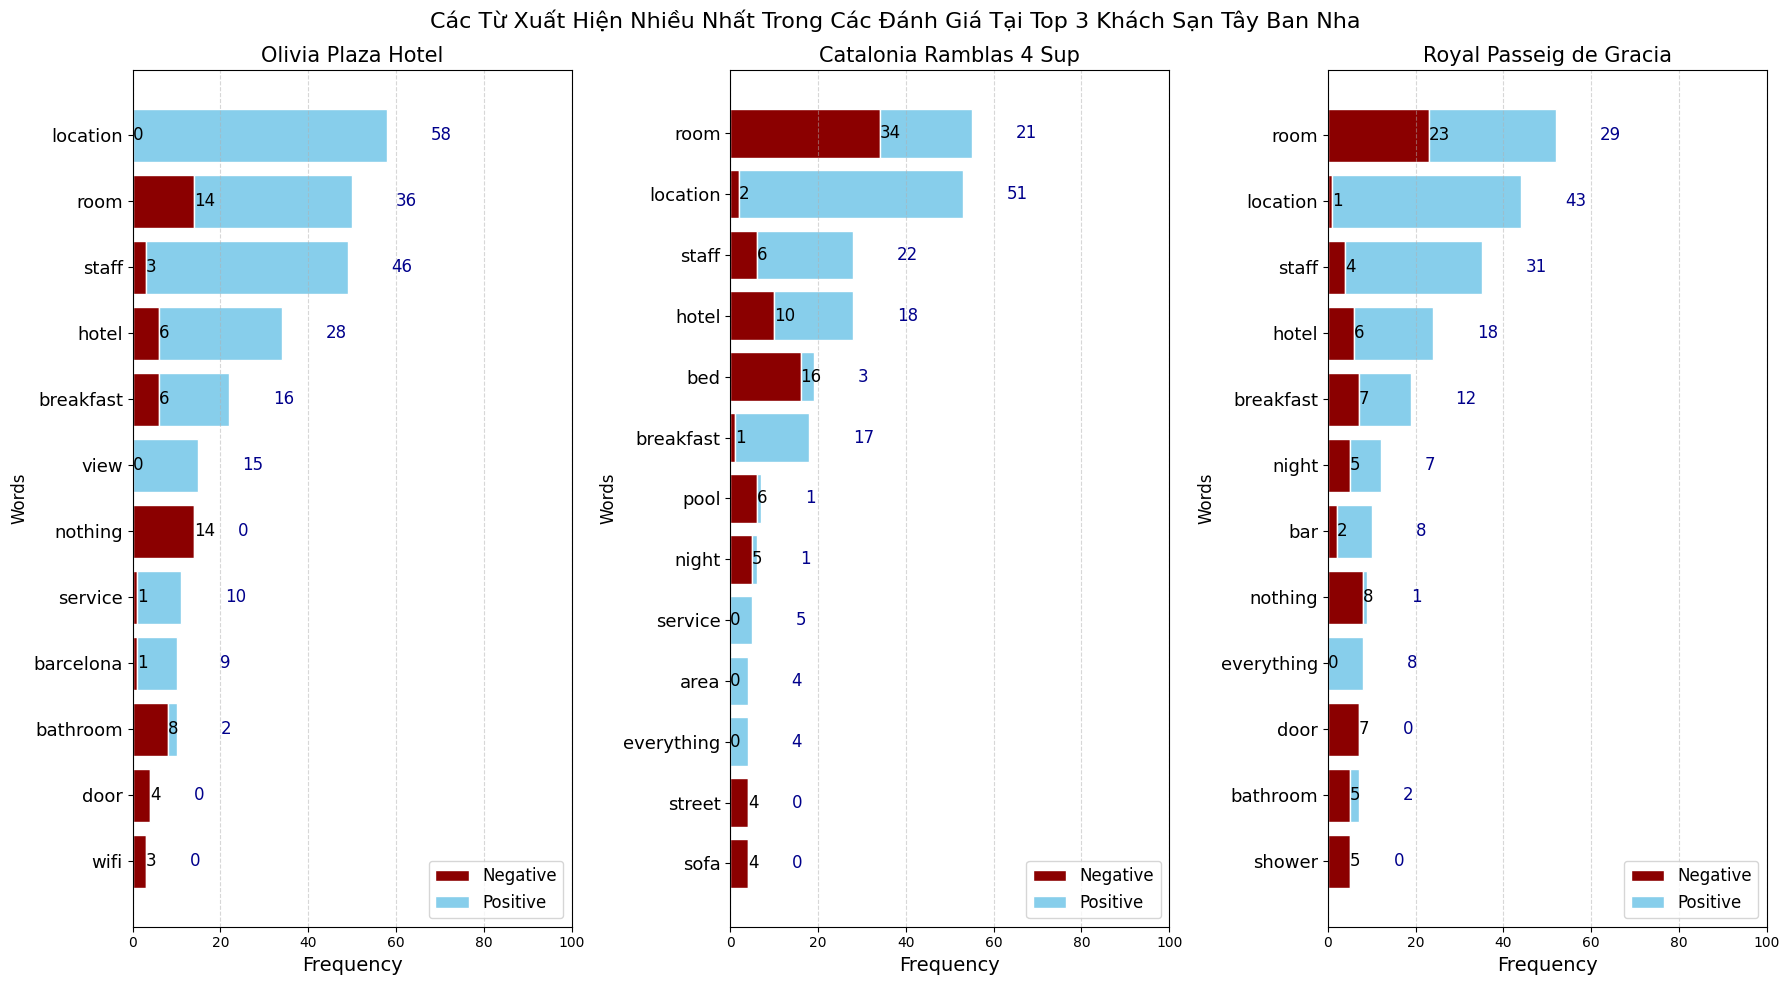

In [63]:
## Spain

#Lọc từ
for hotel, reviews in spain_review.items():
    spain_review[hotel]['Negative_Review'] = remove_stopwords(reviews['Negative_Review'])
    spain_review[hotel]['Positive_Review'] = remove_stopwords(reviews['Positive_Review'])

# Tính số
spain_freq = {}

for hotel, reviews in spain_review.items():
    neg_reviews = reviews['Negative_Review']
    pos_reviews = reviews['Positive_Review']

    #
    neg_freq = calculate_word_frequencies(neg_reviews)
    pos_freq = calculate_word_frequencies(pos_reviews)

    #
    spain_freq[hotel] = {
        'Negative': neg_freq,
        'Positive': pos_freq
    }

#Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.flatten()

# Counter to iterate through axes
plot_idx = 0

for hotel, freq_data in spain_freq.items():
    # Lấy 8 từ phổ biến nhất từ cả tiêu cực và tích cực
    common_neg = freq_data['Negative'].most_common(8)
    common_pos = freq_data['Positive'].most_common(8)

    # Hợp nhất danh sách từ và giá trị tần suất
    words = list(set([word for word, _ in common_neg + common_pos]))
    neg_values = [freq_data['Negative'][word] for word in words]
    pos_values = [freq_data['Positive'][word] for word in words]

    # Tạo DataFrame
    df_spain = pd.DataFrame({
        'Word': words,
        'Negative': neg_values,
        'Positive': pos_values
    })

    # Tính tổng và sắp xếp theo tổng
    df_spain['Total'] = df_spain['Negative'] + df_spain['Positive']
    df_spain = df_spain.sort_values(by='Total')

    # Get the current axis for plotting
    ax = axes[plot_idx]
    plot_idx += 1

    # Vẽ stacked bar chart
    bar_width = 0.5  # Độ rộng cột
    indices = range(len(df_spain))

    ax.barh(indices, df_spain['Negative'], color='darkred', label='Negative', edgecolor='white')
    ax.barh(indices, df_spain['Positive'], left=df_spain['Negative'], color='skyblue', label='Positive', edgecolor='white')

    # Thêm giá trị trên từng phần của cột
    for i in indices:
        neg_width = df_spain['Negative'].iloc[i]
        pos_width = df_spain['Positive'].iloc[i]

        ax.text(neg_width, i, str(neg_width), va='center', color='black', fontsize=12)

        ax.text(neg_width + pos_width + 10, i, str(pos_width), va='center', color='darkblue', fontsize=12)

    #
    ax.set_xlim(0, 100)
    ax.set_yticks(indices)
    ax.set_yticklabels(df_spain['Word'], fontsize=13)
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Words", fontsize=12)
    ax.set_title(f"{hotel}", fontsize=15)
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

#
plt.suptitle('Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Tại Top 3 Khách Sạn Tây Ban Nha', fontsize=16)

#
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### __Biểu đồ 5.18. Các từ xuất hiện nhiều nhất trong các đánh giá của khách Châu Á cho các khách sạn tại Pháp__

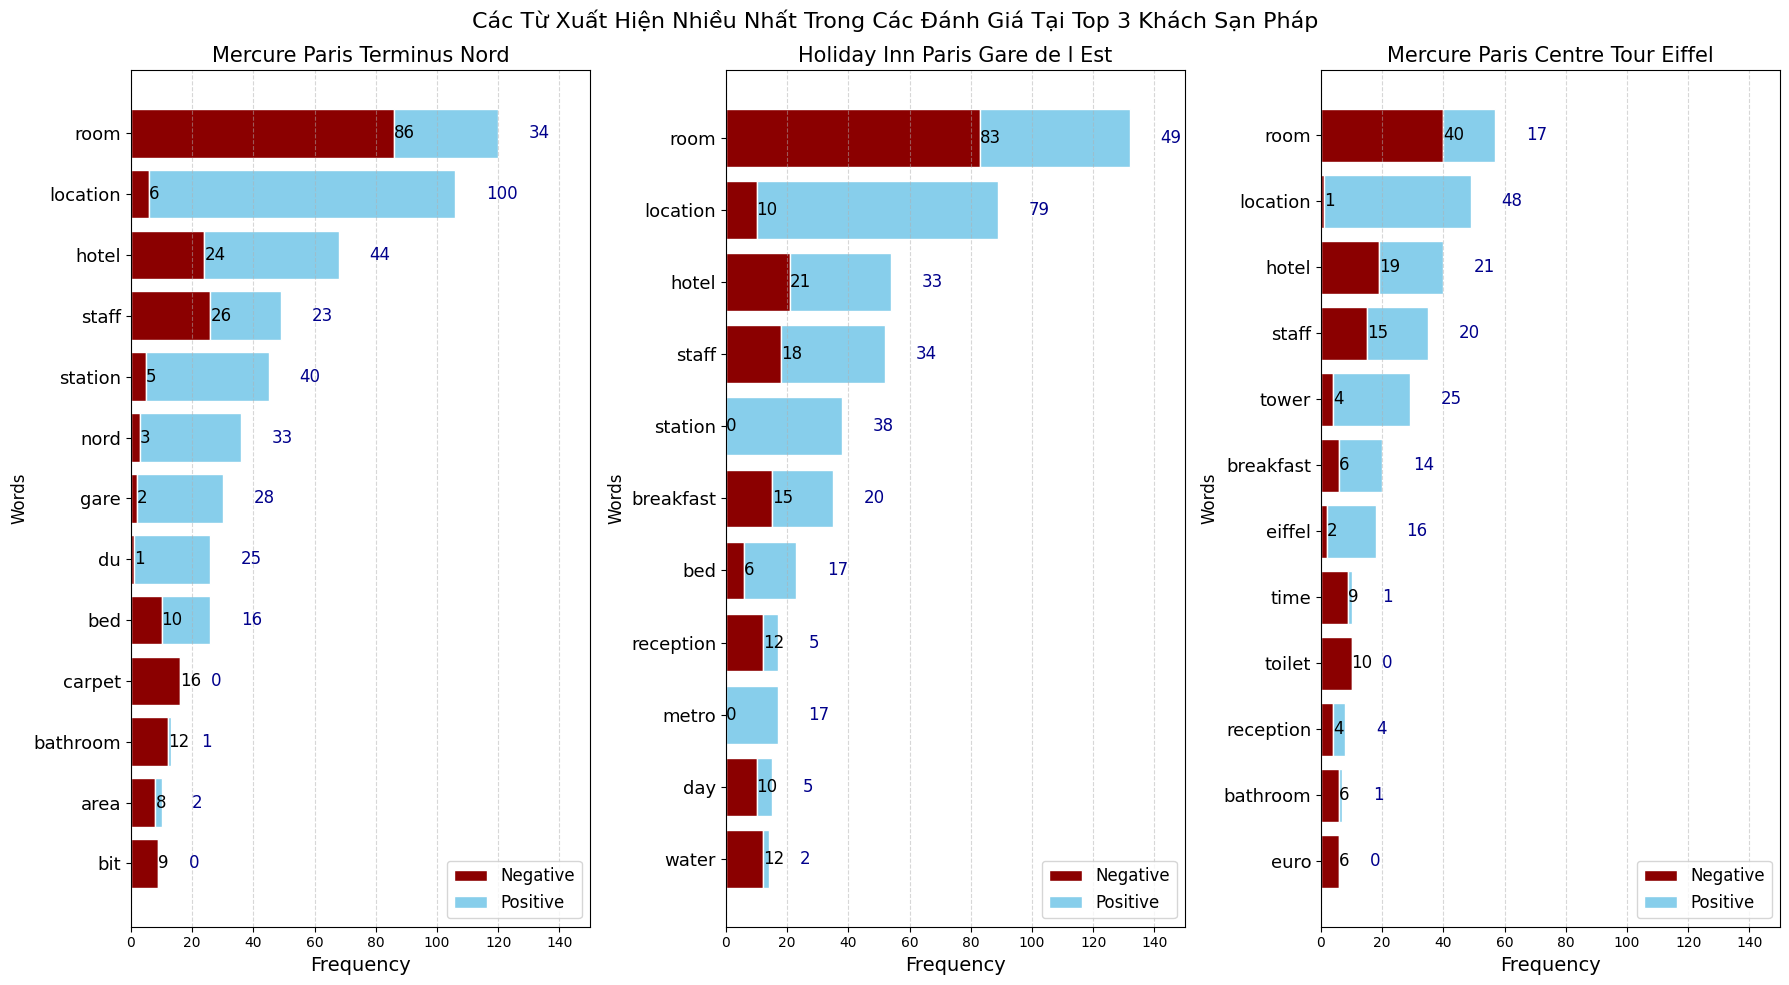

In [64]:
## France

# Lọc từ
for hotel, reviews in france_review.items():
    france_review[hotel]['Negative_Review'] = remove_stopwords(reviews['Negative_Review'])
    france_review[hotel]['Positive_Review'] = remove_stopwords(reviews['Positive_Review'])

# Tính số
france_freq = {}

for hotel, reviews in france_review.items():
    neg_reviews = reviews['Negative_Review']
    pos_reviews = reviews['Positive_Review']

    #
    neg_freq = calculate_word_frequencies(neg_reviews)
    pos_freq = calculate_word_frequencies(pos_reviews)

    #
    france_freq[hotel] = {
        'Negative': neg_freq,
        'Positive': pos_freq
    }

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.flatten()

# Counter to iterate through axes
plot_idx = 0

for hotel, freq_data in france_freq.items():
    # Lấy 8 từ phổ biến nhất từ cả tiêu cực và tích cực
    common_neg = freq_data['Negative'].most_common(8)
    common_pos = freq_data['Positive'].most_common(8)

    # Hợp nhất danh sách từ và giá trị tần suất
    words = list(set([word for word, _ in common_neg + common_pos]))
    neg_values = [freq_data['Negative'][word] for word in words]
    pos_values = [freq_data['Positive'][word] for word in words]

    # Tạo DataFrame
    df_france = pd.DataFrame({
        'Word': words,
        'Negative': neg_values,
        'Positive': pos_values
    })

    # Tính tổng và sắp xếp theo tổng
    df_france['Total'] = df_france['Negative'] + df_france['Positive']
    df_france = df_france.sort_values(by='Total')

    # Get the current axis for plotting
    ax = axes[plot_idx]
    plot_idx += 1

    # Vẽ stacked bar chart
    bar_width = 0.5  # Độ rộng cột
    indices = range(len(df_france))

    ax.barh(indices, df_france['Negative'], color='darkred', label='Negative', edgecolor='white')
    ax.barh(indices, df_france['Positive'], left=df_france['Negative'], color='skyblue', label='Positive', edgecolor='white')

    # Thêm giá trị trên từng phần của cột
    for i in indices:
        neg_width = df_france['Negative'].iloc[i]
        pos_width = df_france['Positive'].iloc[i]

        ax.text(neg_width, i, str(neg_width), va='center', color='black', fontsize=12)

        ax.text(neg_width + pos_width + 10, i, str(pos_width), va='center', color='darkblue', fontsize=12)

    #
    ax.set_xlim(0, 150)
    ax.set_yticks(indices)
    ax.set_yticklabels(df_france['Word'], fontsize=13)
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Words", fontsize=12)
    ax.set_title(f"{hotel}", fontsize=15)
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

#
plt.suptitle('Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Tại Top 3 Khách Sạn Pháp', fontsize=16)

#
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### __Biểu đồ 5.19. Các từ xuất hiện nhiều nhất trong các đánh giá của khách Châu Á cho các khách sạn tại Ý__

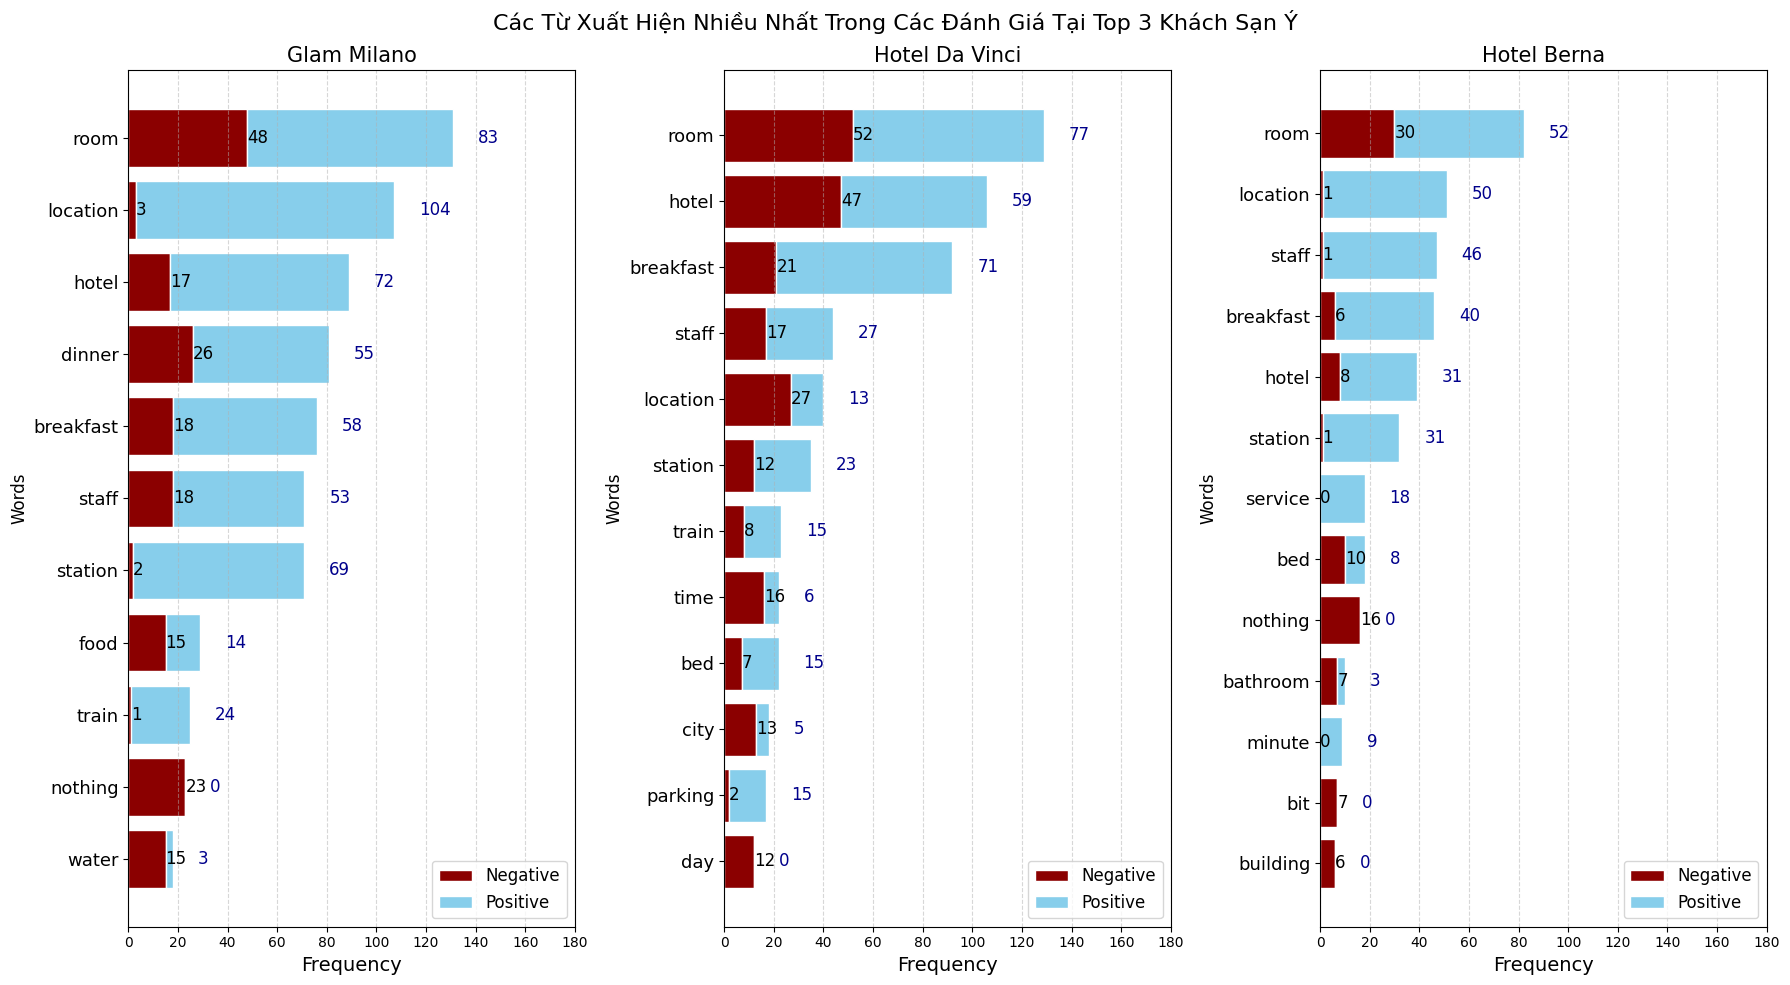

In [65]:
## Italy

# Lọc từ
for hotel, reviews in italy_review.items():
    italy_review[hotel]['Negative_Review'] = remove_stopwords(reviews['Negative_Review'])
    italy_review[hotel]['Positive_Review'] = remove_stopwords(reviews['Positive_Review'])

# Tính số
italy_freq = {}

for hotel, reviews in italy_review.items():
    neg_reviews = reviews['Negative_Review']
    pos_reviews = reviews['Positive_Review']

    #
    neg_freq = calculate_word_frequencies(neg_reviews)
    pos_freq = calculate_word_frequencies(pos_reviews)

    #
    italy_freq[hotel] = {
        'Negative': neg_freq,
        'Positive': pos_freq
    }

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.flatten()

# Counter to iterate through axes
plot_idx = 0

for hotel, freq_data in italy_freq.items():
    # Lấy 8 từ phổ biến nhất từ cả tiêu cực và tích cực
    common_neg = freq_data['Negative'].most_common(8)
    common_pos = freq_data['Positive'].most_common(8)

    # Hợp nhất danh sách từ và giá trị tần suất
    words = list(set([word for word, _ in common_neg + common_pos]))
    neg_values = [freq_data['Negative'][word] for word in words]
    pos_values = [freq_data['Positive'][word] for word in words]

    # Tạo DataFrame
    df_italy = pd.DataFrame({
        'Word': words,
        'Negative': neg_values,
        'Positive': pos_values
    })

    # Tính tổng và sắp xếp theo tổng
    df_italy['Total'] = df_italy['Negative'] + df_italy['Positive']
    df_italy = df_italy.sort_values(by='Total')

    # Get the current axis for plotting
    ax = axes[plot_idx]
    plot_idx += 1

    # Vẽ stacked bar chart
    bar_width = 0.5  # Độ rộng cột
    indices = range(len(df_italy))

    ax.barh(indices, df_italy['Negative'], color='darkred', label='Negative', edgecolor='white')
    ax.barh(indices, df_italy['Positive'], left=df_italy['Negative'], color='skyblue', label='Positive', edgecolor='white')

    # Thêm giá trị trên từng phần của cột
    for i in indices:
        neg_width = df_italy['Negative'].iloc[i]
        pos_width = df_italy['Positive'].iloc[i]

        ax.text(neg_width, i, str(neg_width), va='center', color='black', fontsize=12)

        ax.text(neg_width + pos_width + 10, i, str(pos_width), va='center', color='darkblue', fontsize=12)

    #
    ax.set_xlim(0, 180)
    ax.set_yticks(indices)
    ax.set_yticklabels(df_italy['Word'], fontsize=13)
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Words", fontsize=12)
    ax.set_title(f"{hotel}", fontsize=15)
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

#
plt.suptitle('Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Tại Top 3 Khách Sạn Ý', fontsize=16)

#
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### __Biểu đồ 5.20. Các từ xuất hiện nhiều nhất trong các đánh giá của khách Châu Á tại Anh__

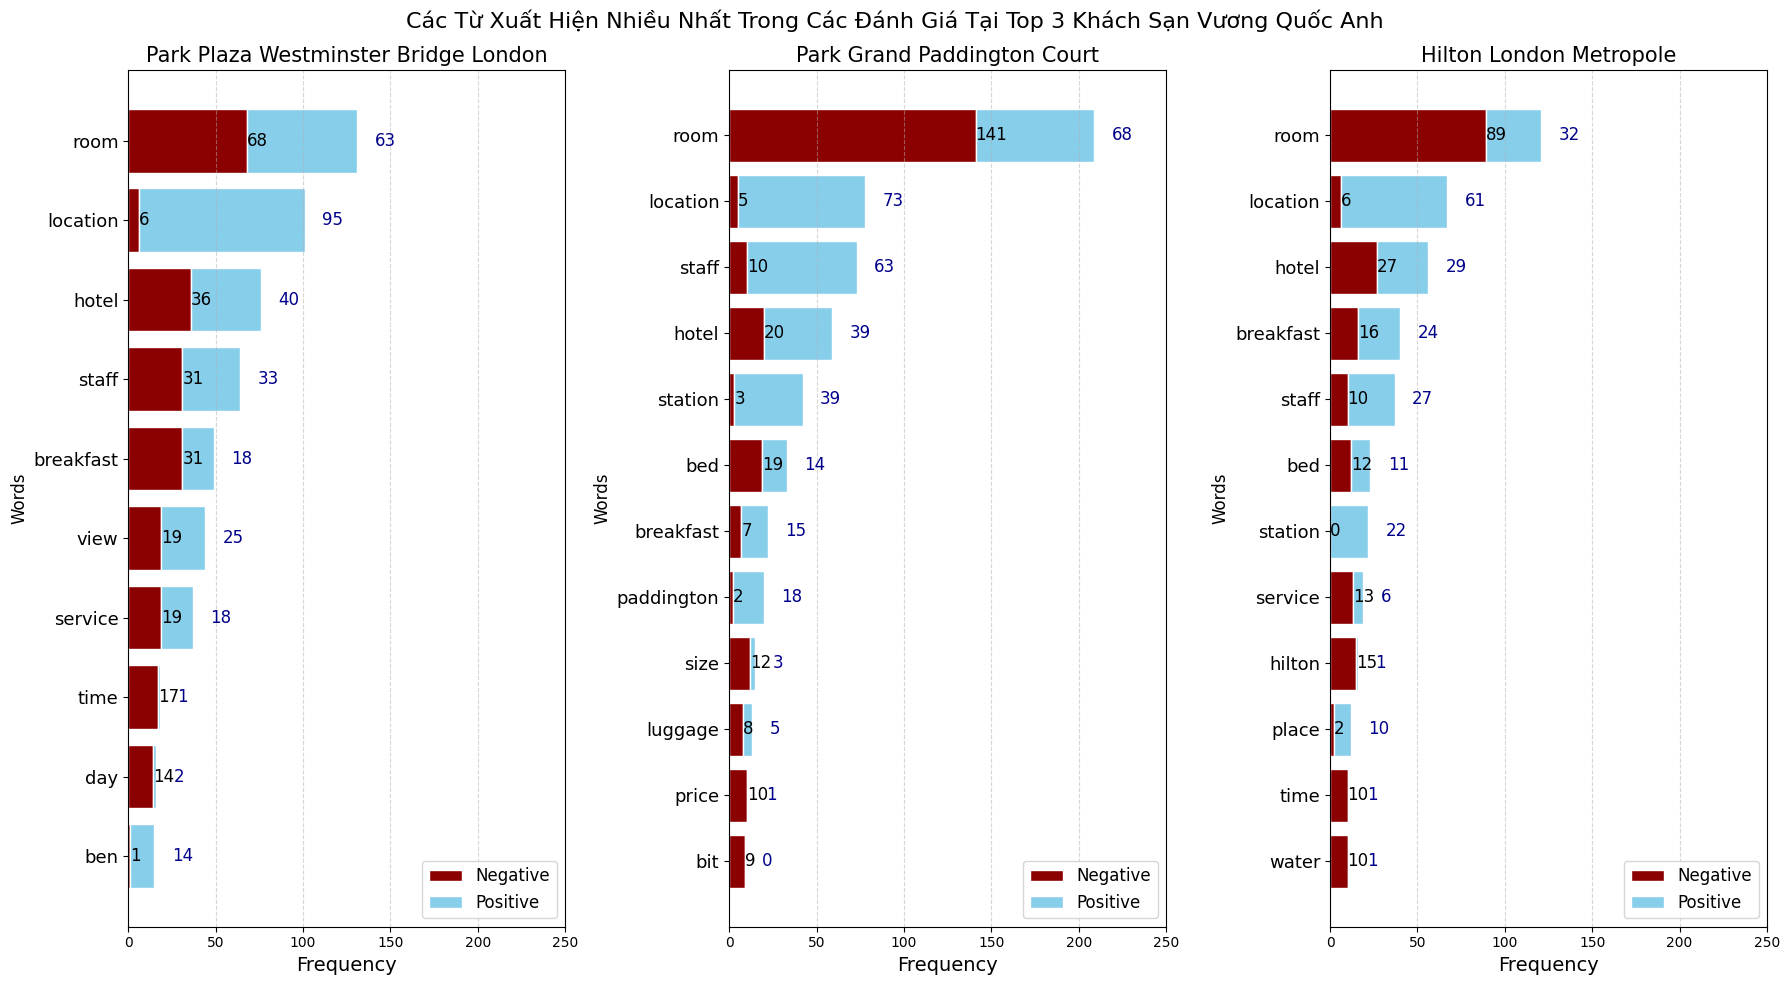

In [66]:
## UK

# Lọc từ
for hotel, reviews in uk_review.items():
    uk_review[hotel]['Negative_Review'] = remove_stopwords(reviews['Negative_Review'])
    uk_review[hotel]['Positive_Review'] = remove_stopwords(reviews['Positive_Review'])

# Tính số
uk_freq = {}

for hotel, reviews in uk_review.items():
    neg_reviews = reviews['Negative_Review']
    pos_reviews = reviews['Positive_Review']

    #
    neg_freq = calculate_word_frequencies(neg_reviews)
    pos_freq = calculate_word_frequencies(pos_reviews)

    #
    uk_freq[hotel] = {
        'Negative': neg_freq,
        'Positive': pos_freq
    }

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.flatten()

# Counter to iterate through axes
plot_idx = 0

for hotel, freq_data in uk_freq.items():
    # Lấy 8 từ phổ biến nhất từ cả tiêu cực và tích cực
    common_neg = freq_data['Negative'].most_common(8)
    common_pos = freq_data['Positive'].most_common(8)

    # Hợp nhất danh sách từ và giá trị tần suất
    words = list(set([word for word, _ in common_neg + common_pos]))
    neg_values = [freq_data['Negative'][word] for word in words]
    pos_values = [freq_data['Positive'][word] for word in words]

    # Tạo DataFrame
    df_uk = pd.DataFrame({
        'Word': words,
        'Negative': neg_values,
        'Positive': pos_values
    })

    # Tính tổng và sắp xếp theo tổng
    df_uk['Total'] = df_uk['Negative'] + df_uk['Positive']
    df_uk = df_uk.sort_values(by='Total')

    ax = axes[plot_idx]
    plot_idx += 1

    # Vẽ stacked bar chart
    bar_width = 0.5  # Độ rộng cột
    indices = range(len(df_uk))

    ax.barh(indices, df_uk['Negative'], color='darkred', label='Negative', edgecolor='white')
    ax.barh(indices, df_uk['Positive'], left=df_uk['Negative'], color='skyblue', label='Positive', edgecolor='white')

    # Thêm giá trị trên từng phần của cột
    for i in indices:
        neg_width = df_uk['Negative'].iloc[i]
        pos_width = df_uk['Positive'].iloc[i]

        ax.text(neg_width, i, str(neg_width), va='center', color='black', fontsize=12)

        ax.text(neg_width + pos_width + 10, i, str(pos_width), va='center', color='darkblue', fontsize=12)

    #
    ax.set_xlim(0, 250)
    ax.set_yticks(indices)
    ax.set_yticklabels(df_uk['Word'], fontsize=13)
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Words", fontsize=12)
    ax.set_title(f"{hotel}", fontsize=15)
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

#
plt.suptitle('Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Tại Top 3 Khách Sạn Vương Quốc Anh', fontsize=16)

#
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### __Biểu đồ 5.21. Các từ xuất hiện nhiều nhất trong các đánh giá của khách Châu Á cho các khách sạn tại Hà Lan__

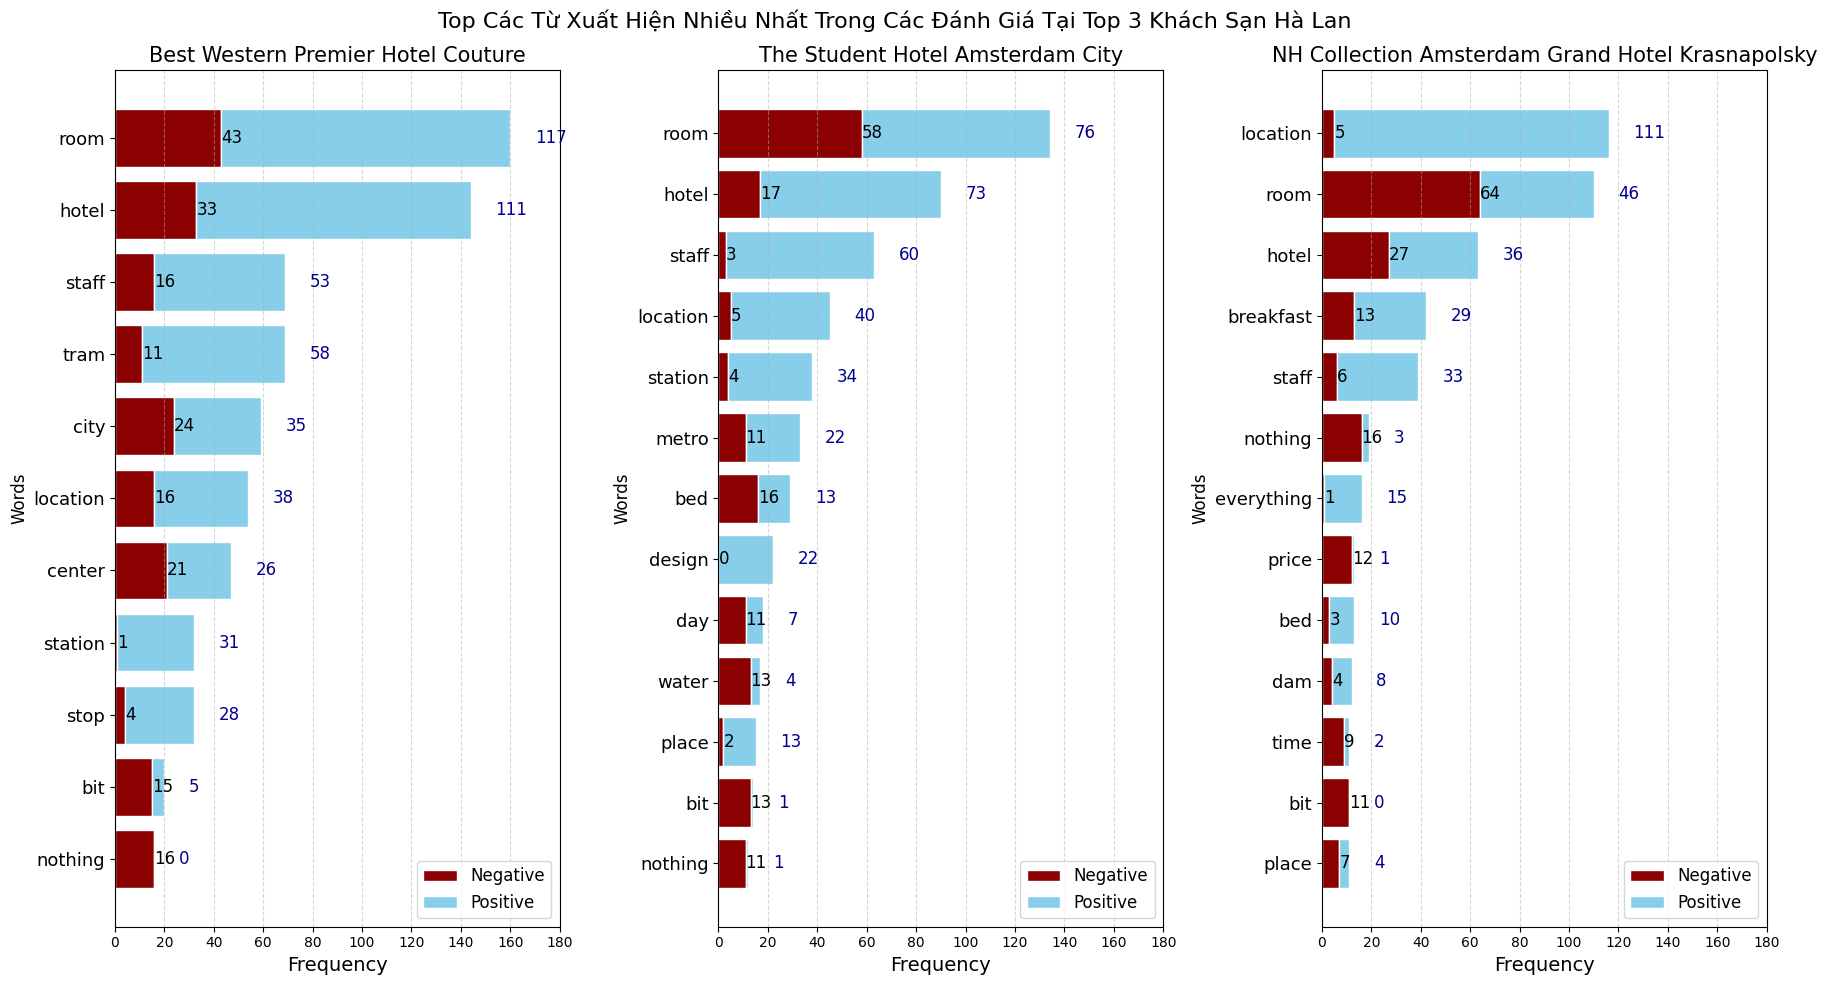

In [68]:
## Netherlands

# Lọc từ
for hotel, reviews in netherlands_review.items():
    netherlands_review[hotel]['Negative_Review'] = remove_stopwords(reviews['Negative_Review'])
    netherlands_review[hotel]['Positive_Review'] = remove_stopwords(reviews['Positive_Review'])

# Tính số
netherlands_freq = {}

for hotel, reviews in netherlands_review.items():
    neg_reviews = reviews['Negative_Review']
    pos_reviews = reviews['Positive_Review']

    #
    neg_freq = calculate_word_frequencies(neg_reviews)
    pos_freq = calculate_word_frequencies(pos_reviews)

    #
    netherlands_freq[hotel] = {
        'Negative': neg_freq,
        'Positive': pos_freq
    }

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.flatten()

# Counter to iterate through axes
plot_idx = 0

for hotel, freq_data in netherlands_freq.items():
    # Lấy 8 từ phổ biến nhất từ cả tiêu cực và tích cực
    common_neg = freq_data['Negative'].most_common(8)
    common_pos = freq_data['Positive'].most_common(8)

    # Hợp nhất danh sách từ và giá trị tần suất
    words = list(set([word for word, _ in common_neg + common_pos]))
    neg_values = [freq_data['Negative'][word] for word in words]
    pos_values = [freq_data['Positive'][word] for word in words]

    # Tạo DataFrame
    df_netherlands = pd.DataFrame({
        'Word': words,
        'Negative': neg_values,
        'Positive': pos_values
    })

    # Tính tổng và sắp xếp theo tổng
    df_netherlands['Total'] = df_netherlands['Negative'] + df_netherlands['Positive']
    df_netherlands = df_netherlands.sort_values(by='Total')

    # Get the current axis for plotting
    ax = axes[plot_idx]
    plot_idx += 1

    # Vẽ stacked bar chart
    bar_width = 0.5  # Độ rộng cột
    indices = range(len(df_netherlands))

    ax.barh(indices, df_netherlands['Negative'], color='darkred', label='Negative', edgecolor='white')
    ax.barh(indices, df_netherlands['Positive'], left=df_netherlands['Negative'], color='skyblue', label='Positive', edgecolor='white')

    # Thêm giá trị trên từng phần của cột
    for i in indices:
        neg_width = df_netherlands['Negative'].iloc[i]
        pos_width = df_netherlands['Positive'].iloc[i]

        ax.text(neg_width, i, str(neg_width), va='center', color='black', fontsize=12)

        ax.text(neg_width + pos_width + 10, i, str(pos_width), va='center', color='darkblue', fontsize=12)

    #
    ax.set_xlim(0, 180)
    ax.set_yticks(indices)
    ax.set_yticklabels(df_netherlands['Word'], fontsize=13)
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Words", fontsize=12)
    ax.set_title(f"{hotel}", fontsize=15)
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

#
plt.suptitle('Top Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Tại Top 3 Khách Sạn Hà Lan', fontsize=16)

#
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()

### __Biểu đồ 5.22. Các từ xuất hiện nhiều nhất trong các đánh giá của khách Châu Á cho các khách sạn tại Áo__

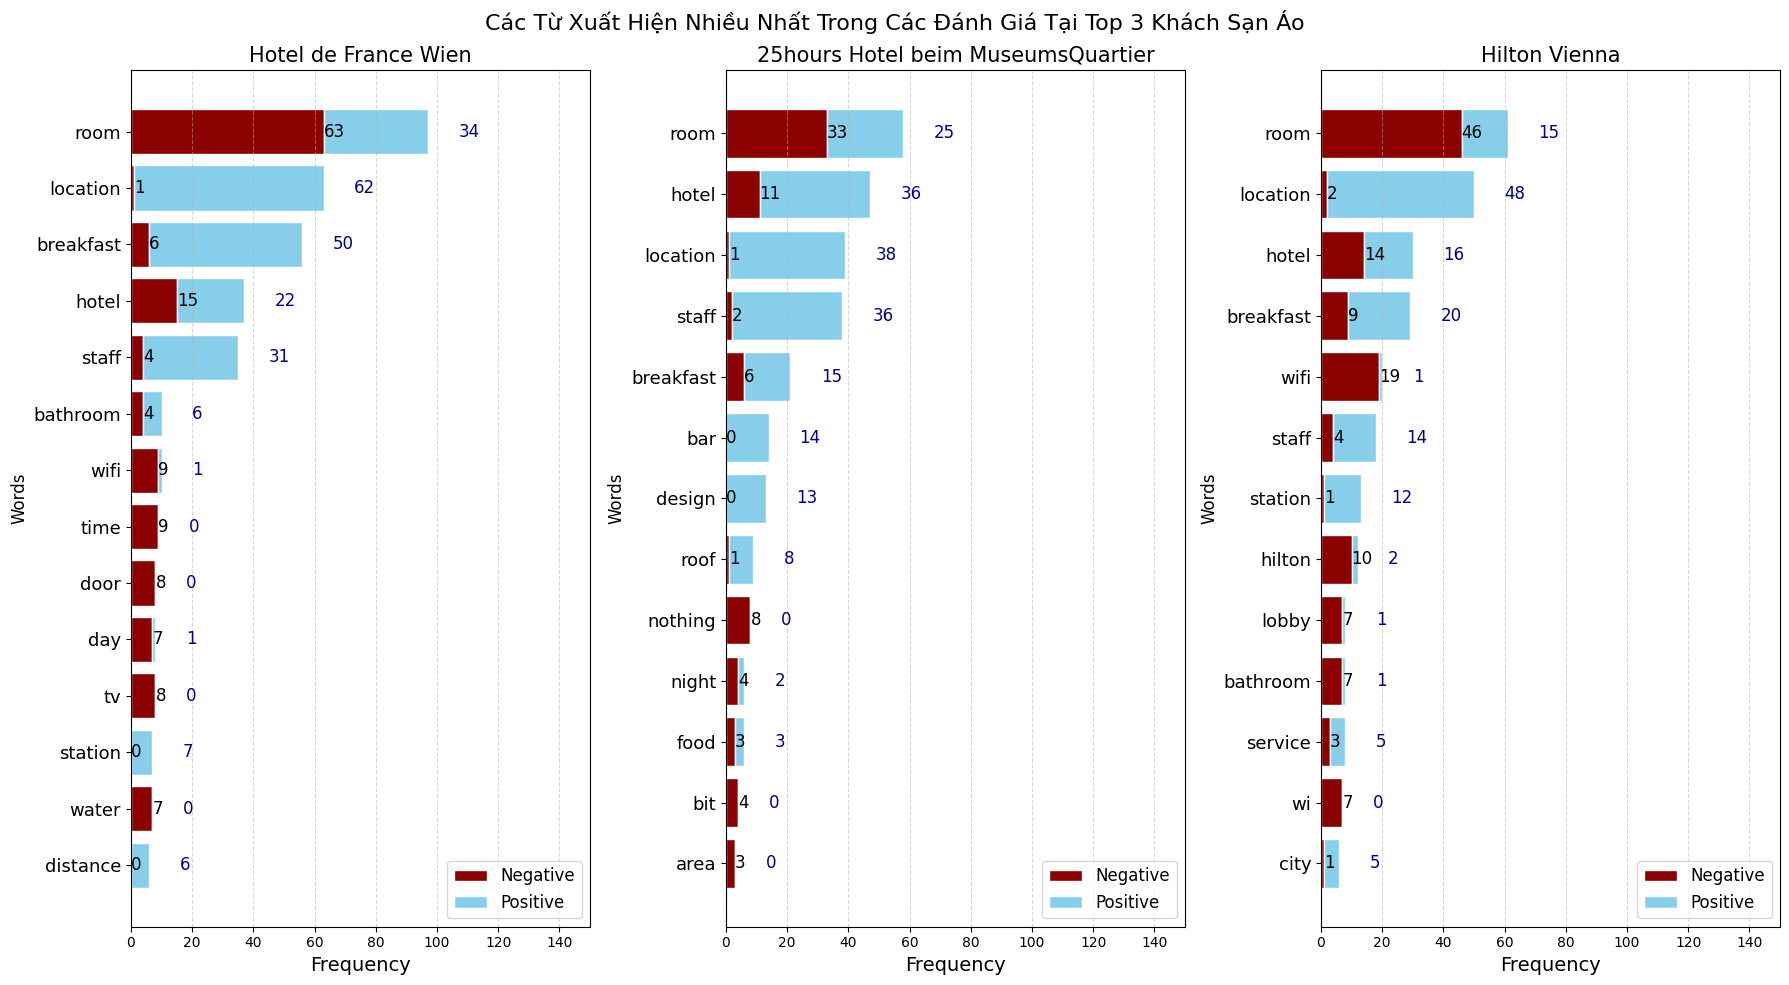

In [69]:
## Austria

# Lọc từ
for hotel, reviews in austria_review.items():
    austria_review[hotel]['Negative_Review'] = remove_stopwords(reviews['Negative_Review'])
    austria_review[hotel]['Positive_Review'] = remove_stopwords(reviews['Positive_Review'])

# Tính số
austria_freq = {}

for hotel, reviews in austria_review.items():
    neg_reviews = reviews['Negative_Review']
    pos_reviews = reviews['Positive_Review']

    #
    neg_freq = calculate_word_frequencies(neg_reviews)
    pos_freq = calculate_word_frequencies(pos_reviews)

    #
    austria_freq[hotel] = {
        'Negative': neg_freq,
        'Positive': pos_freq
    }

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 3, figsize=(18, 10))
axes = axes.flatten()

# Counter to iterate through axes
plot_idx = 0

for hotel, freq_data in austria_freq.items():
    # Lấy 8 từ phổ biến nhất từ cả tiêu cực và tích cực
    common_neg = freq_data['Negative'].most_common(8)
    common_pos = freq_data['Positive'].most_common(8)

    # Hợp nhất danh sách từ và giá trị tần suất
    words = list(set([word for word, _ in common_neg + common_pos]))
    neg_values = [freq_data['Negative'][word] for word in words]
    pos_values = [freq_data['Positive'][word] for word in words]

    # Tạo DataFrame
    df_austria = pd.DataFrame({
        'Word': words,
        'Negative': neg_values,
        'Positive': pos_values
    })

    # Tính tổng và sắp xếp theo tổng
    df_austria['Total'] = df_austria['Negative'] + df_austria['Positive']
    df_austria = df_austria.sort_values(by='Total')

    # Get the current axis for plotting
    ax = axes[plot_idx]
    plot_idx += 1

    # Vẽ stacked bar chart
    bar_width = 0.5  # Độ rộng cột
    indices = range(len(df_austria))

    ax.barh(indices, df_austria['Negative'], color='darkred', label='Negative', edgecolor='white')
    ax.barh(indices, df_austria['Positive'], left=df_austria['Negative'], color='skyblue', label='Positive', edgecolor='white')

    # Thêm giá trị trên từng phần của cột
    for i in indices:
        neg_width = df_austria['Negative'].iloc[i]
        pos_width = df_austria['Positive'].iloc[i]

        ax.text(neg_width, i, str(neg_width), va='center', color='black', fontsize=12)

        ax.text(neg_width + pos_width + 10, i, str(pos_width), va='center', color='darkblue', fontsize=12)

    #
    ax.set_xlim(0, 150)
    ax.set_yticks(indices)
    ax.set_yticklabels(df_austria['Word'], fontsize=13)
    ax.set_xlabel("Frequency", fontsize=14)
    ax.set_ylabel("Words", fontsize=12)
    ax.set_title(f"{hotel}", fontsize=15)
    ax.legend(loc='lower right', fontsize=12)
    ax.grid(axis='x', linestyle='--', alpha=0.5)

#
plt.suptitle('Các Từ Xuất Hiện Nhiều Nhất Trong Các Đánh Giá Tại Top 3 Khách Sạn Áo', fontsize=16)

#
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()